# 1. Data Cleaning

In [2]:
import pandas as pd
from datetime import datetime

# Load data
census_df = pd.read_excel('Data for Data Scientist_2025.xlsx', sheet_name='CensusData')
ed_df = pd.read_excel('Data for Data Scientist_2025.xlsx', sheet_name='ED Data')

# Reference date: May 5, 2025
cutoff_date = pd.Timestamp('2025-05-05')

print("=" * 80)
print("BEFORE CLEANING")
print("=" * 80)
print(f"Census Data: {len(census_df)} records")
print(f"  Date range: {census_df['Report_Date'].min()} to {census_df['Report_Date'].max()}")
print(f"  Census value range: {census_df['Census'].min()} to {census_df['Census'].max()}")
print(f"\nED Data: {len(ed_df)} records")
print(f"  Date range: {ed_df['ReportDate'].min()} to {ed_df['ReportDate'].max()}")
print(f"  ED Volume range: {ed_df['ED Volume'].min()} to {ed_df['ED Volume'].max()}")

# Clean Census Data
# Remove future dates (after May 5, 2025)
census_clean = census_df[census_df['Report_Date'] <= cutoff_date].copy()

# Remove outliers (Census > 10000 is clearly an error)
census_clean = census_clean[census_clean['Census'] <= 10000].copy()

# Clean ED Data
# Remove future dates
ed_clean = ed_df[ed_df['ReportDate'] <= cutoff_date].copy()

# Remove outliers (ED Volume > 10000 is clearly an error)
ed_clean = ed_clean[ed_clean['ED Volume'] <= 10000].copy()

print("\n" + "=" * 80)
print("AFTER CLEANING")
print("=" * 80)
print(f"Census Data: {len(census_clean)} records (removed {len(census_df) - len(census_clean)})")
print(f"  Date range: {census_clean['Report_Date'].min()} to {census_clean['Report_Date'].max()}")
print(f"  Census value range: {census_clean['Census'].min()} to {census_clean['Census'].max()}")
print(f"\nED Data: {len(ed_clean)} records (removed {len(ed_df) - len(ed_clean)})")
print(f"  Date range: {ed_clean['ReportDate'].min()} to {ed_clean['ReportDate'].max()}")
print(f"  ED Volume range: {ed_clean['ED Volume'].min()} to {ed_clean['ED Volume'].max()}")

BEFORE CLEANING
Census Data: 14040 records
  Date range: 2022-01-01 00:00:00 to 2026-01-06 00:00:00
  Census value range: 15 to 950000

ED Data: 9840 records
  Date range: 2016-04-01 00:00:00 to 2025-12-27 00:00:00
  ED Volume range: 190 to 770000

AFTER CLEANING
Census Data: 14037 records (removed 3)
  Date range: 2022-01-01 00:00:00 to 2025-03-31 00:00:00
  Census value range: 15 to 1290

ED Data: 9836 records (removed 4)
  Date range: 2016-04-01 00:00:00 to 2025-03-31 00:00:00
  ED Volume range: 190 to 1455


# 2. EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Prepare data
census_clean['Year'] = census_clean['Report_Date'].dt.year
census_clean['Month'] = census_clean['Report_Date'].dt.month
census_clean['DayOfWeek'] = census_clean['Report_Date'].dt.dayofweek
census_clean['Quarter'] = census_clean['Report_Date'].dt.quarter

ed_clean['Year'] = ed_clean['ReportDate'].dt.year
ed_clean['Month'] = ed_clean['ReportDate'].dt.month
ed_clean['DayOfWeek'] = ed_clean['ReportDate'].dt.dayofweek
ed_clean['Quarter'] = ed_clean['ReportDate'].dt.quarter

print("=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

EXPLORATORY DATA ANALYSIS


## 2.1 Overall Statistics

In [5]:
# 1. Overall Statistics
print("\n1. OVERALL STATISTICS")
print("\nCensus by Campus & Service:")
print(census_clean.groupby(['Campus', 'Service'])['Census'].agg(['mean', 'std', 'min', 'max']).round(1))

print("\n\nED Volume by Campus:")
print(ed_clean.groupby('Campus')['ED Volume'].agg(['mean', 'std', 'min', 'max']).round(1))


1. OVERALL STATISTICS

Census by Campus & Service:
                   mean    std  min   max
Campus Service                           
SHB    Medicine   652.5   85.8  430   895
       Surgery     84.4   28.1   15   260
SHC    Medicine   668.2  100.4  395   935
       Surgery    144.5   32.3   60   250
SHG    Medicine  1038.7   94.4  770  1290
       Surgery    174.5   37.0   70   370


ED Volume by Campus:
             mean    std  min   max
Campus                             
Birchmount  643.5  119.2  190  1000
Centenary   936.5  167.1  305  1455
General     904.5  140.3  390  1455
SHC         860.0    NaN  860   860


## 2.2 Trend Analysis


✓ Trend charts saved: eda_trends.png


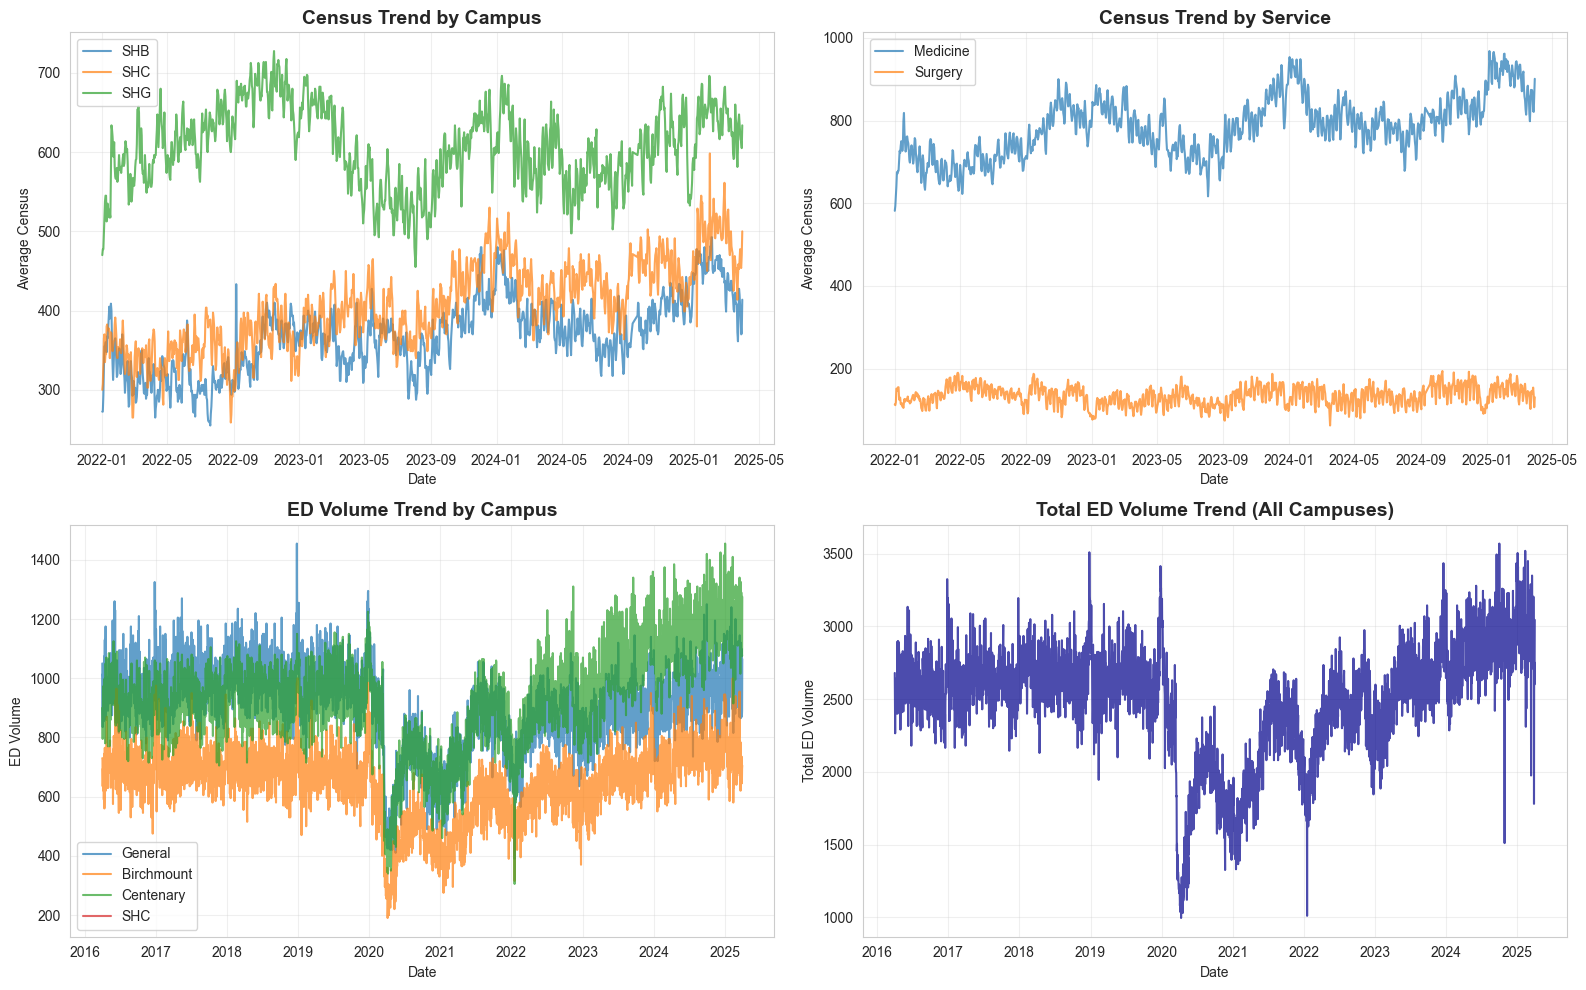

In [8]:
# 2. Trend Analysis - Census
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Census by Campus over time
for campus in census_clean['Campus'].unique():
    campus_data = census_clean[census_clean['Campus'] == campus].groupby('Report_Date')['Census'].mean()
    axes[0, 0].plot(campus_data.index, campus_data.values, label=campus, alpha=0.7)
axes[0, 0].set_title('Census Trend by Campus', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Average Census')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Census by Service
for service in census_clean['Service'].unique():
    service_data = census_clean[census_clean['Service'] == service].groupby('Report_Date')['Census'].mean()
    axes[0, 1].plot(service_data.index, service_data.values, label=service, alpha=0.7)
axes[0, 1].set_title('Census Trend by Service', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Census')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ED Volume by Campus
for campus in ed_clean['Campus'].unique():
    campus_data = ed_clean[ed_clean['Campus'] == campus].groupby('ReportDate')['ED Volume'].mean()
    axes[1, 0].plot(campus_data.index, campus_data.values, label=campus, alpha=0.7)
axes[1, 0].set_title('ED Volume Trend by Campus', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('ED Volume')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Total ED Volume
total_ed = ed_clean.groupby('ReportDate')['ED Volume'].sum()
axes[1, 1].plot(total_ed.index, total_ed.values, color='darkblue', alpha=0.7)
axes[1, 1].set_title('Total ED Volume Trend (All Campuses)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total ED Volume')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('/home/claude/eda_trends.png', dpi=300, bbox_inches='tight')
print("\n✓ Trend charts saved: eda_trends.png")
plt.show()
plt.close()

## 2.3 Seasonality Analysis

✓ Seasonality charts saved: eda_seasonality.png


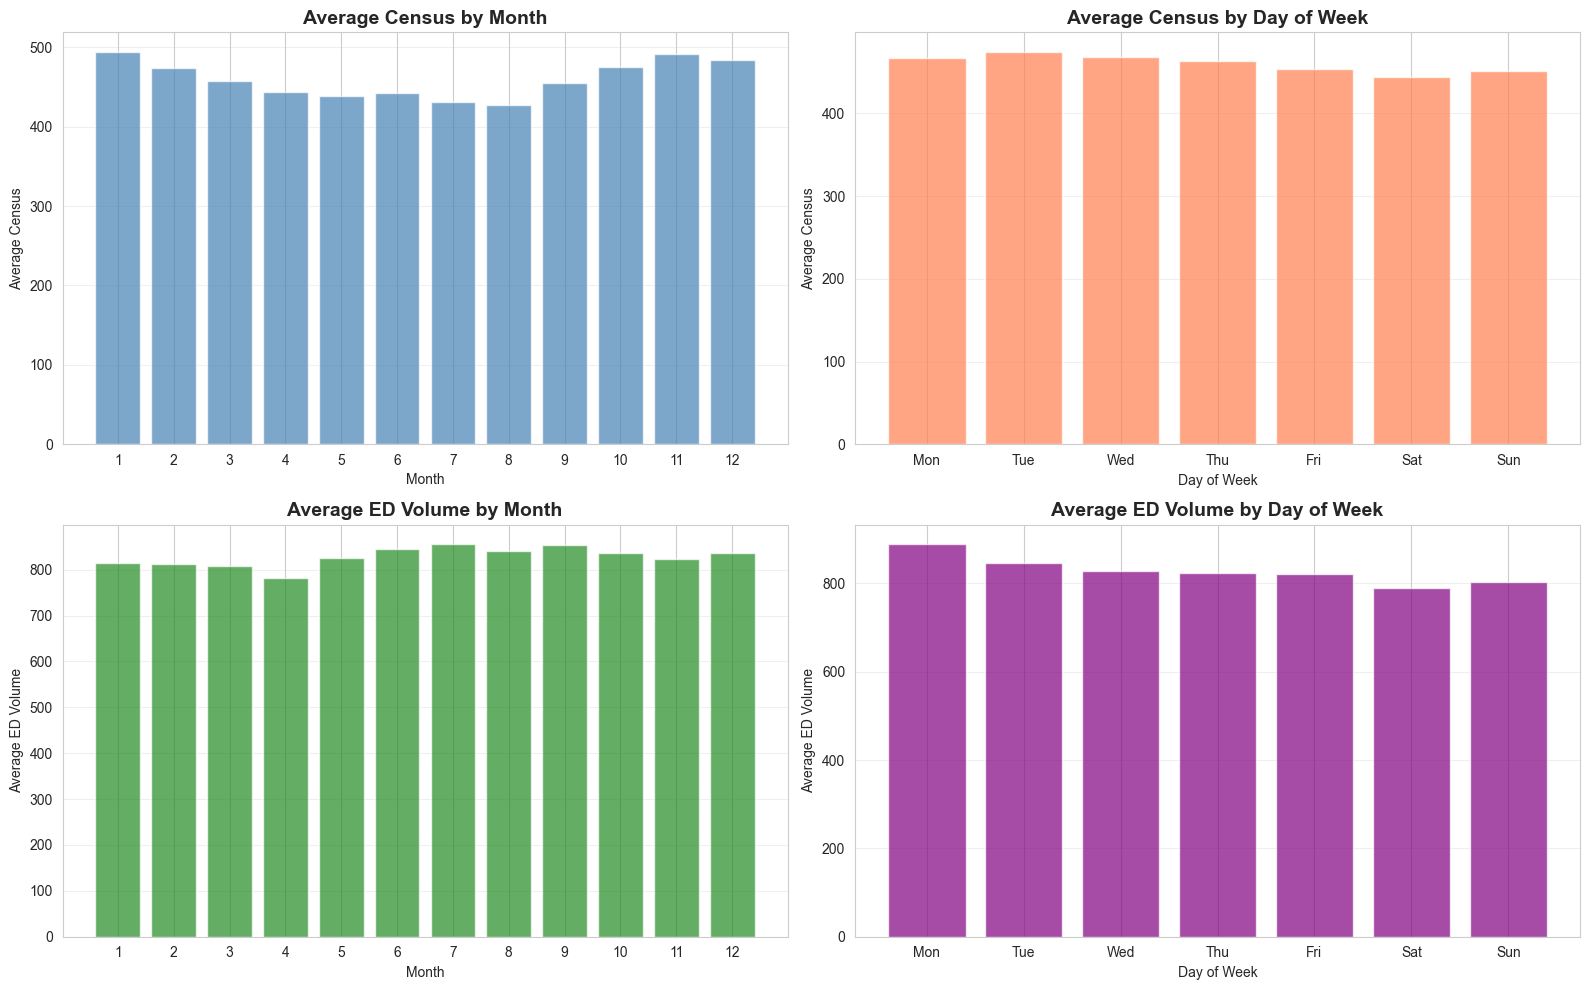

In [10]:
# 3. Seasonality Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Census by Month
census_monthly = census_clean.groupby('Month')['Census'].mean()
axes[0, 0].bar(census_monthly.index, census_monthly.values, color='steelblue', alpha=0.7)
axes[0, 0].set_title('Average Census by Month', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Census')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Census by Day of Week
census_dow = census_clean.groupby('DayOfWeek')['Census'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(census_dow.index, census_dow.values, color='coral', alpha=0.7)
axes[0, 1].set_title('Average Census by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Census')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(days)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# ED Volume by Month
ed_monthly = ed_clean.groupby('Month')['ED Volume'].mean()
axes[1, 0].bar(ed_monthly.index, ed_monthly.values, color='forestgreen', alpha=0.7)
axes[1, 0].set_title('Average ED Volume by Month', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average ED Volume')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# ED Volume by Day of Week
ed_dow = ed_clean.groupby('DayOfWeek')['ED Volume'].mean()
axes[1, 1].bar(ed_dow.index, ed_dow.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Average ED Volume by Day of Week', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average ED Volume')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(days)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
#plt.savefig('/home/claude/eda_seasonality.png', dpi=300, bbox_inches='tight')
print("✓ Seasonality charts saved: eda_seasonality.png")
plt.show()
plt.close()

## 2.4 YOY Growth

In [11]:
# 4. Year-over-Year Growth
print("\n\n2. YEAR-OVER-YEAR GROWTH")
census_yearly = census_clean.groupby('Year')['Census'].mean()
ed_yearly = ed_clean.groupby('Year')['ED Volume'].mean()

print("\nAverage Census by Year:")
print(census_yearly.round(1))
print("\nYoY Growth %:")
print(census_yearly.pct_change().mul(100).round(2))

print("\n\nAverage ED Volume by Year:")
print(ed_yearly.round(1))
print("\nYoY Growth %:")
print(ed_yearly.pct_change().mul(100).round(2))



2. YEAR-OVER-YEAR GROWTH

Average Census by Year:
Year
2022    437.4
2023    454.3
2024    473.9
2025    524.5
Name: Census, dtype: float64

YoY Growth %:
Year
2022      NaN
2023     3.86
2024     4.31
2025    10.67
Name: Census, dtype: float64


Average ED Volume by Year:
Year
2016    860.4
2017    870.7
2018    884.6
2019    875.0
2020    635.7
2021    708.9
2022    780.9
2023    864.5
2024    945.3
2025    983.1
Name: ED Volume, dtype: float64

YoY Growth %:
Year
2016      NaN
2017     1.21
2018     1.59
2019    -1.08
2020   -27.35
2021    11.53
2022    10.14
2023    10.71
2024     9.35
2025     4.00
Name: ED Volume, dtype: float64


## 2.5 Campus Comparison

✓ Campus comparison saved: eda_campus_comparison.png


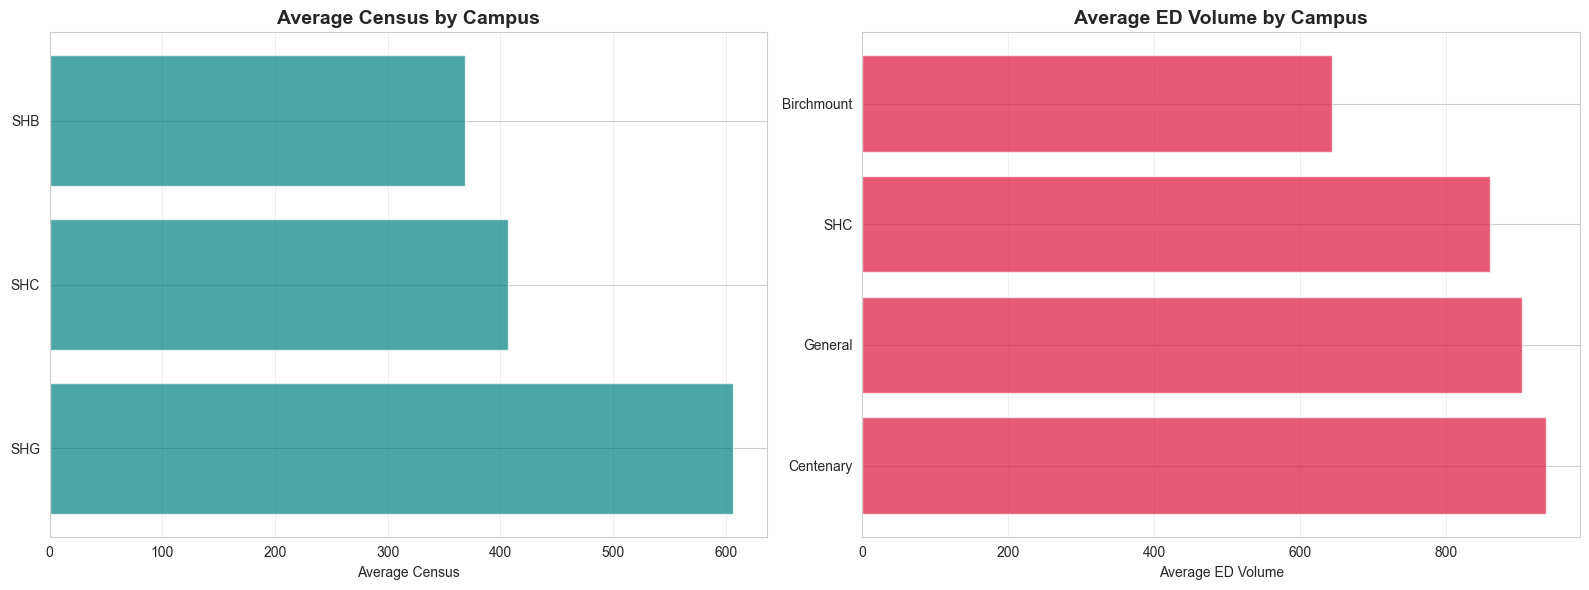


EDA COMPLETE - 3 visualizations created


In [14]:
# 5. Campus Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Census by Campus
census_campus = census_clean.groupby('Campus')['Census'].mean().sort_values(ascending=False)
axes[0].barh(census_campus.index, census_campus.values, color='teal', alpha=0.7)
axes[0].set_title('Average Census by Campus', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Average Census')
axes[0].grid(True, alpha=0.3, axis='x')

# ED Volume by Campus
ed_campus = ed_clean.groupby('Campus')['ED Volume'].mean().sort_values(ascending=False)
axes[1].barh(ed_campus.index, ed_campus.values, color='crimson', alpha=0.7)
axes[1].set_title('Average ED Volume by Campus', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average ED Volume')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
#plt.savefig('/home/claude/eda_campus_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Campus comparison saved: eda_campus_comparison.png")
plt.show()
plt.close()

print("\n" + "=" * 80)
print("EDA COMPLETE - 3 visualizations created")
print("=" * 80)

# 3. Prediction

## 3.1 SARIMA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [17]:
# ============================================================================
# 1. PREPARE AGGREGATED TIME SERIES
# ============================================================================

# Aggregate Census data by date (total across all campuses/services)
census_daily = census_clean.groupby('Report_Date')['Census'].sum().reset_index()
census_daily.set_index('Report_Date', inplace=True)
census_daily = census_daily.asfreq('D').ffill()

# Aggregate ED data by date
ed_daily = ed_clean.groupby('ReportDate')['ED Volume'].sum().reset_index()
ed_daily.set_index('ReportDate', inplace=True)
ed_daily = ed_daily.asfreq('D').ffill()

print("\n1. DATA PREPARATION")
print(f"Census data: {census_daily.index.min()} to {census_daily.index.max()}")
print(f"ED data: {ed_daily.index.min()} to {ed_daily.index.max()}")


1. DATA PREPARATION
Census data: 2022-01-01 00:00:00 to 2025-03-31 00:00:00
ED data: 2016-04-01 00:00:00 to 2025-03-31 00:00:00


In [18]:
# ============================================================================
# 2. TRAIN-TEST SPLIT (Last 3 months for validation)
# ============================================================================

train_size_census = len(census_daily) - 90
train_census = census_daily.iloc[:train_size_census]
test_census = census_daily.iloc[train_size_census:]

train_size_ed = len(ed_daily) - 90
train_ed = ed_daily.iloc[:train_size_ed]
test_ed = ed_daily.iloc[train_size_ed:]

print(f"\n2. TRAIN-TEST SPLIT")
print(f"Census - Train: {len(train_census)} days, Test: {len(test_census)} days")
print(f"ED - Train: {len(train_ed)} days, Test: {len(test_ed)} days")


2. TRAIN-TEST SPLIT
Census - Train: 1096 days, Test: 90 days
ED - Train: 3197 days, Test: 90 days


In [19]:
# ============================================================================
# 3. BUILD SARIMA MODELS
# ============================================================================

print("\n3. BUILDING SARIMA MODELS...")

# Census Model: SARIMA(1,1,1)(1,1,1,7) - weekly seasonality
census_model = SARIMAX(train_census['Census'], 
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
census_fit = census_model.fit(disp=False)
print("✓ Census SARIMA model fitted")

# ED Model: SARIMA(1,1,1)(1,1,1,7) - weekly seasonality
ed_model = SARIMAX(train_ed['ED Volume'],
                   order=(1, 1, 1),
                   seasonal_order=(1, 1, 1, 7),
                   enforce_stationarity=False,
                   enforce_invertibility=False)
ed_fit = ed_model.fit(disp=False)
print("✓ ED SARIMA model fitted")


3. BUILDING SARIMA MODELS...
✓ Census SARIMA model fitted
✓ ED SARIMA model fitted


In [20]:
# ============================================================================
# 4. MODEL VALIDATION ON TEST SET
# ============================================================================

print("\n4. MODEL VALIDATION")

# Census predictions
census_pred_test = census_fit.forecast(steps=len(test_census))
census_mae = mean_absolute_error(test_census['Census'], census_pred_test)
census_rmse = np.sqrt(mean_squared_error(test_census['Census'], census_pred_test))
census_mape = np.mean(np.abs((test_census['Census'] - census_pred_test) / test_census['Census'])) * 100

print(f"\nCensus Model Performance:")
print(f"  MAE: {census_mae:.2f}")
print(f"  RMSE: {census_rmse:.2f}")
print(f"  MAPE: {census_mape:.2f}%")

# ED predictions
ed_pred_test = ed_fit.forecast(steps=len(test_ed))
ed_mae = mean_absolute_error(test_ed['ED Volume'], ed_pred_test)
ed_rmse = np.sqrt(mean_squared_error(test_ed['ED Volume'], ed_pred_test))
ed_mape = np.mean(np.abs((test_ed['ED Volume'] - ed_pred_test) / test_ed['ED Volume'])) * 100

print(f"\nED Model Performance:")
print(f"  MAE: {ed_mae:.2f}")
print(f"  RMSE: {ed_rmse:.2f}")
print(f"  MAPE: {ed_mape:.2f}%")


4. MODEL VALIDATION

Census Model Performance:
  MAE: 607.59
  RMSE: 659.98
  MAPE: 9.52%

ED Model Performance:
  MAE: 250.49
  RMSE: 335.04
  MAPE: 9.39%


In [21]:
# ============================================================================
# 5. REFIT ON FULL DATA AND FORECAST
# ============================================================================

print("\n5. GENERATING FORECASTS...")

# Refit on full data
census_model_full = SARIMAX(census_daily['Census'],
                            order=(1, 1, 1),
                            seasonal_order=(1, 1, 1, 7),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
census_fit_full = census_model_full.fit(disp=False)

ed_model_full = SARIMAX(ed_daily['ED Volume'],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
ed_fit_full = ed_model_full.fit(disp=False)

# Forecast next 5 years (1825 days)
forecast_days = 1825
census_forecast = census_fit_full.forecast(steps=forecast_days)
ed_forecast = ed_fit_full.forecast(steps=forecast_days)

# Get confidence intervals
census_forecast_obj = census_fit_full.get_forecast(steps=forecast_days)
census_ci = census_forecast_obj.conf_int()

ed_forecast_obj = ed_fit_full.get_forecast(steps=forecast_days)
ed_ci = ed_forecast_obj.conf_int()

print("✓ 5-year forecasts generated")


5. GENERATING FORECASTS...
✓ 5-year forecasts generated


In [22]:
# ============================================================================
# 6. EXTRACT WINTER 2025-26 FORECAST
# ============================================================================

winter_start = pd.Timestamp('2025-09-01')
winter_end = pd.Timestamp('2026-03-31')

census_forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=census_daily.index.max() + pd.Timedelta(days=1), periods=forecast_days, freq='D'),
    'Forecast': census_forecast.values,
    'Lower_CI': census_ci.iloc[:, 0].values,
    'Upper_CI': census_ci.iloc[:, 1].values
})

ed_forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=ed_daily.index.max() + pd.Timedelta(days=1), periods=forecast_days, freq='D'),
    'Forecast': ed_forecast.values,
    'Lower_CI': ed_ci.iloc[:, 0].values,
    'Upper_CI': ed_ci.iloc[:, 1].values
})

winter_census = census_forecast_df[(census_forecast_df['Date'] >= winter_start) & 
                                   (census_forecast_df['Date'] <= winter_end)]
winter_ed = ed_forecast_df[(ed_forecast_df['Date'] >= winter_start) & 
                           (ed_forecast_df['Date'] <= winter_end)]

print(f"\n6. WINTER 2025-26 FORECAST (Sept 2025 - March 2026)")
print(f"\nExpected Daily Census:")
print(f"  Average: {winter_census['Forecast'].mean():.0f}")
print(f"  Range: {winter_census['Forecast'].min():.0f} - {winter_census['Forecast'].max():.0f}")
print(f"\nExpected Daily ED Volume:")
print(f"  Average: {winter_ed['Forecast'].mean():.0f}")
print(f"  Range: {winter_ed['Forecast'].min():.0f} - {winter_ed['Forecast'].max():.0f}")


6. WINTER 2025-26 FORECAST (Sept 2025 - March 2026)

Expected Daily Census:
  Average: 6532
  Range: 6180 - 6862

Expected Daily ED Volume:
  Average: 2690
  Range: 2553 - 2938



✓ Full forecast visualization saved: forecast_full.png


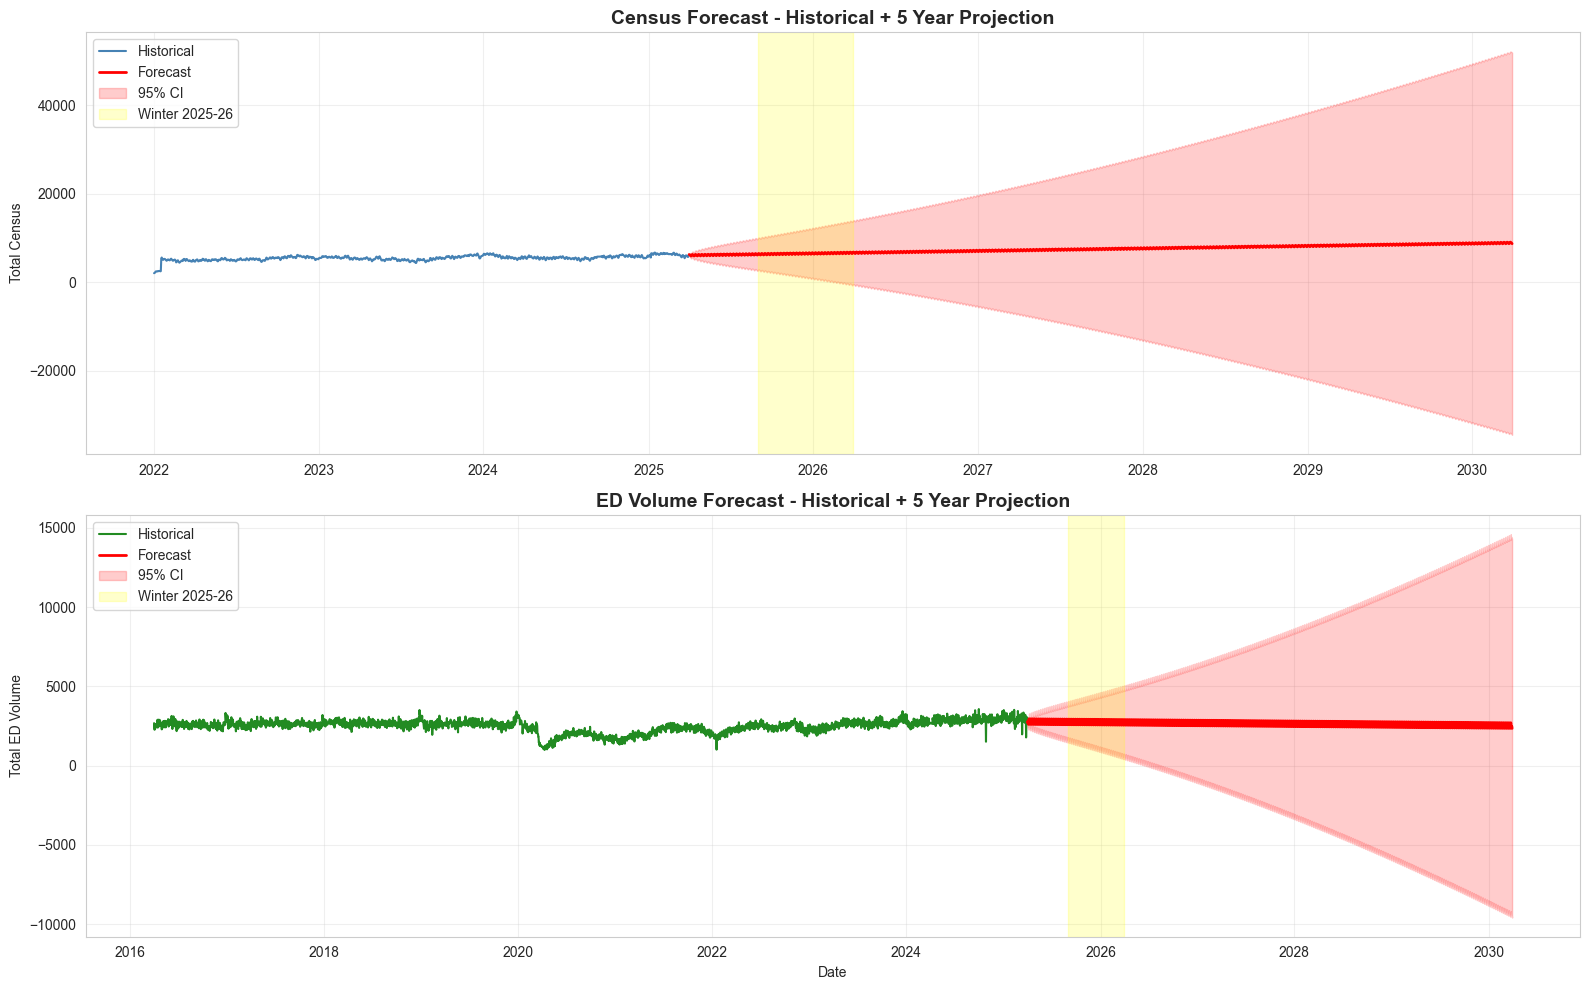

✓ Winter forecast visualization saved: forecast_winter.png


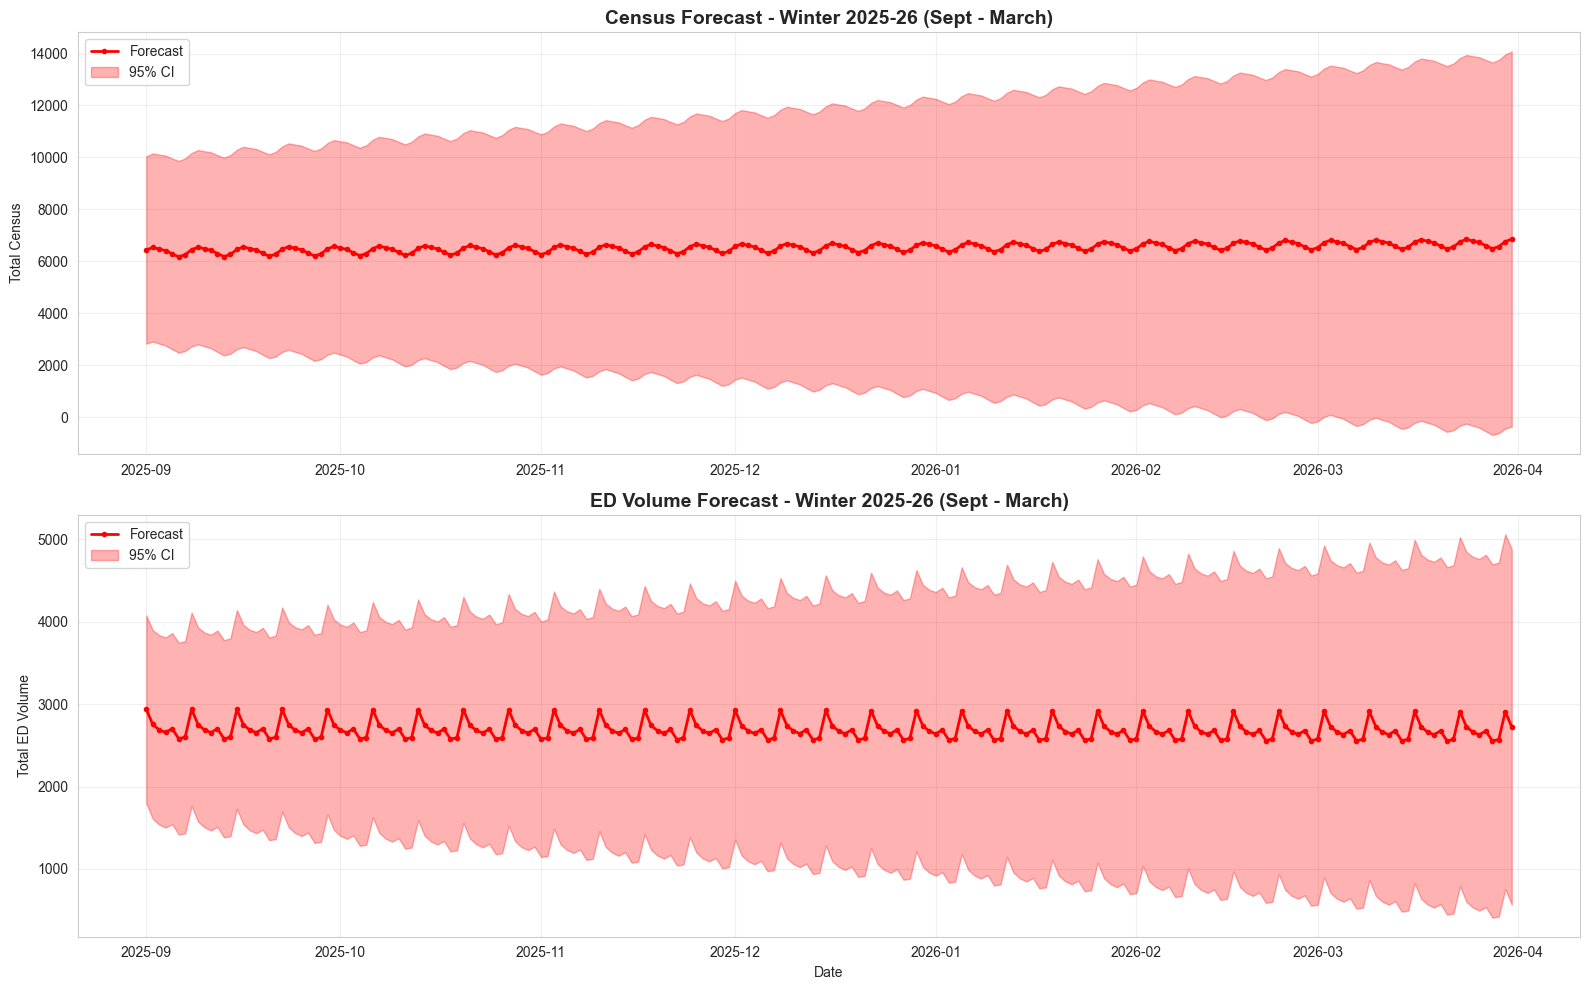

In [24]:
# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================

# Plot 1: Historical + Forecast with Winter Highlight
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Census
axes[0].plot(census_daily.index, census_daily['Census'], label='Historical', color='steelblue', linewidth=1.5)
axes[0].plot(census_forecast_df['Date'], census_forecast_df['Forecast'], 
             label='Forecast', color='red', linewidth=2)
axes[0].fill_between(census_forecast_df['Date'], 
                     census_forecast_df['Lower_CI'],
                     census_forecast_df['Upper_CI'],
                     alpha=0.2, color='red', label='95% CI')
axes[0].axvspan(winter_start, winter_end, alpha=0.2, color='yellow', label='Winter 2025-26')
axes[0].set_title('Census Forecast - Historical + 5 Year Projection', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Census')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ED Volume
axes[1].plot(ed_daily.index, ed_daily['ED Volume'], label='Historical', color='forestgreen', linewidth=1.5)
axes[1].plot(ed_forecast_df['Date'], ed_forecast_df['Forecast'], 
             label='Forecast', color='red', linewidth=2)
axes[1].fill_between(ed_forecast_df['Date'],
                     ed_forecast_df['Lower_CI'],
                     ed_forecast_df['Upper_CI'],
                     alpha=0.2, color='red', label='95% CI')
axes[1].axvspan(winter_start, winter_end, alpha=0.2, color='yellow', label='Winter 2025-26')
axes[1].set_title('ED Volume Forecast - Historical + 5 Year Projection', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total ED Volume')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('/home/claude/forecast_full.png', dpi=300, bbox_inches='tight')
print("\n✓ Full forecast visualization saved: forecast_full.png")
plt.show()
plt.close()

# Plot 2: Zoomed Winter Forecast
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Census - Winter only
axes[0].plot(winter_census['Date'], winter_census['Forecast'], 
             label='Forecast', color='red', linewidth=2, marker='o', markersize=3)
axes[0].fill_between(winter_census['Date'],
                     winter_census['Lower_CI'],
                     winter_census['Upper_CI'],
                     alpha=0.3, color='red', label='95% CI')
axes[0].set_title('Census Forecast - Winter 2025-26 (Sept - March)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Census')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ED - Winter only
axes[1].plot(winter_ed['Date'], winter_ed['Forecast'], 
             label='Forecast', color='red', linewidth=2, marker='o', markersize=3)
axes[1].fill_between(winter_ed['Date'],
                     winter_ed['Lower_CI'],
                     winter_ed['Upper_CI'],
                     alpha=0.3, color='red', label='95% CI')
axes[1].set_title('ED Volume Forecast - Winter 2025-26 (Sept - March)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total ED Volume')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('/home/claude/forecast_winter.png', dpi=300, bbox_inches='tight')
print("✓ Winter forecast visualization saved: forecast_winter.png")
plt.show()
plt.close()

In [ ]:
# ============================================================================
# 8. SAVE FORECASTS TO EXCEL
# ============================================================================

with pd.ExcelWriter('/home/claude/forecasts.xlsx', engine='openpyxl') as writer:
    census_forecast_df.to_excel(writer, sheet_name='Census_Forecast', index=False)
    ed_forecast_df.to_excel(writer, sheet_name='ED_Forecast', index=False)
    winter_census.to_excel(writer, sheet_name='Winter_Census', index=False)
    winter_ed.to_excel(writer, sheet_name='Winter_ED', index=False)

print("✓ Forecasts saved to Excel: forecasts.xlsx")

print("\n" + "=" * 80)
print("FORECASTING COMPLETE")
print("=" * 80)

## 3.2 SARIMAX

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [26]:
# ============================================================================
# 1. PREPARE DATA WITH EXOGENOUS VARIABLES
# ============================================================================

print("\n1. PREPARING DATA WITH EXOGENOUS VARIABLES")

# Census Data: Encode Campus and Service as exogenous variables
census_clean['Campus_encoded'] = LabelEncoder().fit_transform(census_clean['Campus'])
census_clean['Service_encoded'] = LabelEncoder().fit_transform(census_clean['Service'])

# Create daily aggregated data with average exog values
census_daily = census_clean.groupby('Report_Date').agg({
    'Census': 'sum',
    'Campus_encoded': 'mean',
    'Service_encoded': 'mean'
}).reset_index()
census_daily.set_index('Report_Date', inplace=True)
census_daily = census_daily.asfreq('D').ffill()

print(f"Census data shape: {census_daily.shape}")
print(f"Date range: {census_daily.index.min()} to {census_daily.index.max()}")

# ED Data: Encode Campus as exogenous variable
ed_clean['Campus_encoded'] = LabelEncoder().fit_transform(ed_clean['Campus'])

ed_daily = ed_clean.groupby('ReportDate').agg({
    'ED Volume': 'sum',
    'Campus_encoded': 'mean'
}).reset_index()
ed_daily.set_index('ReportDate', inplace=True)
ed_daily = ed_daily.asfreq('D').ffill()

print(f"ED data shape: {ed_daily.shape}")
print(f"Date range: {ed_daily.index.min()} to {ed_daily.index.max()}")


1. PREPARING DATA WITH EXOGENOUS VARIABLES
Census data shape: (1186, 3)
Date range: 2022-01-01 00:00:00 to 2025-03-31 00:00:00
ED data shape: (3287, 2)
Date range: 2016-04-01 00:00:00 to 2025-03-31 00:00:00


In [27]:
# ============================================================================
# 2. BUILD SARIMAX MODELS
# ============================================================================

print("\n2. BUILDING SARIMAX MODELS...")

# Census SARIMAX with Campus and Service as exog
census_exog = census_daily[['Campus_encoded', 'Service_encoded']]
census_endog = census_daily['Census']

census_model = SARIMAX(census_endog,
                       exog=census_exog,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
census_fit = census_model.fit(disp=False)
print("✓ Census SARIMAX model fitted with Campus and Service as exog variables")

# ED SARIMAX with Campus as exog
ed_exog = ed_daily[['Campus_encoded']]
ed_endog = ed_daily['ED Volume']

ed_model = SARIMAX(ed_endog,
                   exog=ed_exog,
                   order=(1, 1, 1),
                   seasonal_order=(1, 1, 1, 7),
                   enforce_stationarity=False,
                   enforce_invertibility=False)
ed_fit = ed_model.fit(disp=False)
print("✓ ED SARIMAX model fitted with Campus as exog variable")


2. BUILDING SARIMAX MODELS...
✓ Census SARIMAX model fitted with Campus and Service as exog variables
✓ ED SARIMAX model fitted with Campus as exog variable


In [28]:
# ============================================================================
# 3. GENERATE FORECASTS
# ============================================================================

print("\n3. GENERATING FORECASTS...")

# For forecasting, we need future exog values (use mean historical values)
census_exog_mean = census_exog.mean()
ed_exog_mean = ed_exog.mean()

# Forecast 5 years (1825 days)
forecast_days = 1825
forecast_start = max(census_daily.index.max(), ed_daily.index.max()) + pd.Timedelta(days=1)
forecast_dates = pd.date_range(start=forecast_start, periods=forecast_days, freq='D')

# Create future exog variables (constant at mean values)
census_exog_future = pd.DataFrame({
    'Campus_encoded': [census_exog_mean['Campus_encoded']] * forecast_days,
    'Service_encoded': [census_exog_mean['Service_encoded']] * forecast_days
}, index=forecast_dates)

ed_exog_future = pd.DataFrame({
    'Campus_encoded': [ed_exog_mean['Campus_encoded']] * forecast_days
}, index=forecast_dates)

# Generate forecasts
census_forecast = census_fit.forecast(steps=forecast_days, exog=census_exog_future)
ed_forecast = ed_fit.forecast(steps=forecast_days, exog=ed_exog_future)

# Create forecast dataframes
census_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': census_forecast.values
})

ed_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': ed_forecast.values
})

print("✓ 5-year forecasts generated")


3. GENERATING FORECASTS...
✓ 5-year forecasts generated


In [29]:
# ============================================================================
# 4. EXTRACT WINTER AND 5-YEAR FORECASTS
# ============================================================================

# Winter 2025-26: September 2025 to March 2026
winter_start = pd.Timestamp('2025-09-01')
winter_end = pd.Timestamp('2026-03-31')

winter_census = census_forecast_df[(census_forecast_df['Date'] >= winter_start) & 
                                   (census_forecast_df['Date'] <= winter_end)].copy()
winter_ed = ed_forecast_df[(ed_forecast_df['Date'] >= winter_start) & 
                           (ed_forecast_df['Date'] <= winter_end)].copy()

# Aggregate to weekly
winter_census['Week'] = winter_census['Date'].dt.to_period('W').dt.start_time
winter_census_weekly = winter_census.groupby('Week')['Forecast'].mean().reset_index()
winter_census_weekly.columns = ['Week', 'Census_Forecast']

winter_ed['Week'] = winter_ed['Date'].dt.to_period('W').dt.start_time
winter_ed_weekly = winter_ed.groupby('Week')['Forecast'].mean().reset_index()
winter_ed_weekly.columns = ['Week', 'ED_Forecast']

print(f"\n4. WINTER 2025-26 FORECAST")
print(f"Census - Weekly average: {winter_census_weekly['Census_Forecast'].mean():.0f}")
print(f"ED - Weekly average: {winter_ed_weekly['ED_Forecast'].mean():.0f}")

# 5-year monthly: April 2025 to March 2030
monthly_start = pd.Timestamp('2025-04-01')
monthly_end = pd.Timestamp('2030-03-31')

monthly_census = census_forecast_df[(census_forecast_df['Date'] >= monthly_start) & 
                                    (census_forecast_df['Date'] <= monthly_end)].copy()
monthly_ed = ed_forecast_df[(ed_forecast_df['Date'] >= monthly_start) & 
                            (ed_forecast_df['Date'] <= monthly_end)].copy()

monthly_census['Month'] = monthly_census['Date'].dt.to_period('M').dt.start_time
monthly_census_agg = monthly_census.groupby('Month')['Forecast'].mean().reset_index()
monthly_census_agg.columns = ['Month', 'Census_Forecast']

monthly_ed['Month'] = monthly_ed['Date'].dt.to_period('M').dt.start_time
monthly_ed_agg = monthly_ed.groupby('Month')['Forecast'].mean().reset_index()
monthly_ed_agg.columns = ['Month', 'ED_Forecast']

print(f"\n5-YEAR FORECAST (April 2025 - March 2030)")
print(f"Census - Monthly average: {monthly_census_agg['Census_Forecast'].mean():.0f}")
print(f"ED - Monthly average: {monthly_ed_agg['ED_Forecast'].mean():.0f}")


4. WINTER 2025-26 FORECAST
Census - Weekly average: 6588
ED - Weekly average: 2692

5-YEAR FORECAST (April 2025 - March 2030)
Census - Monthly average: 7762
ED - Monthly average: 2596



5. CREATING VISUALIZATIONS...
✓ Viz 1: Census winter weekly forecast saved


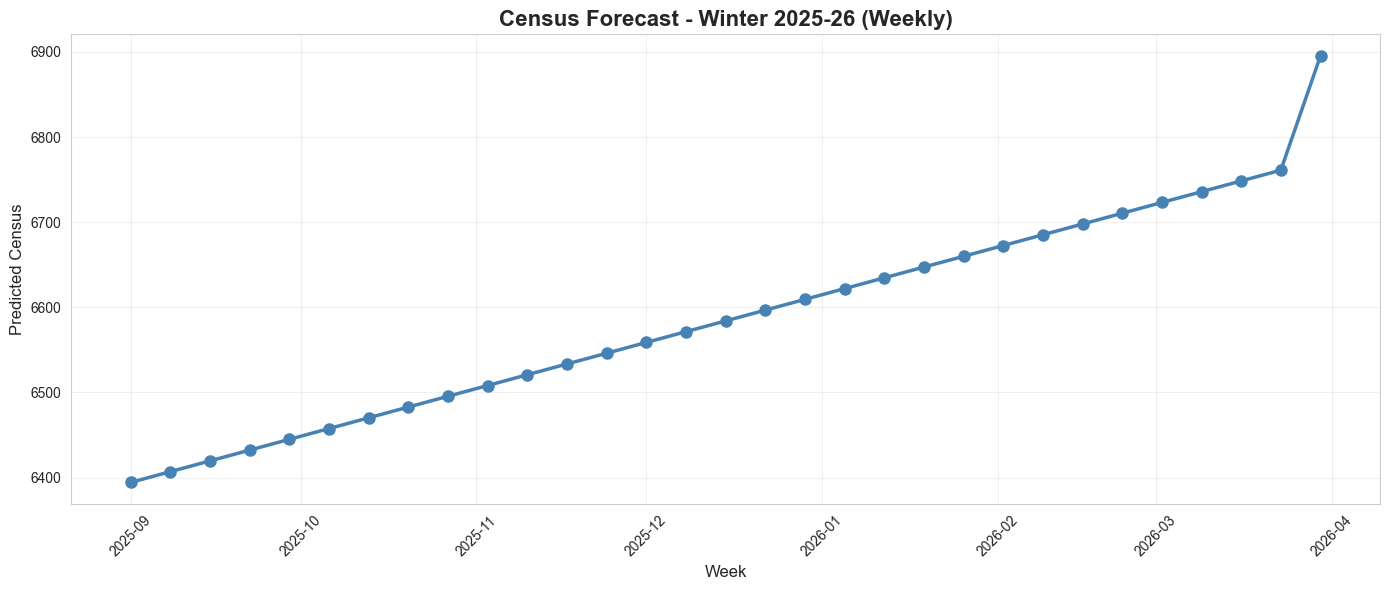

✓ Viz 2: ED winter weekly forecast saved


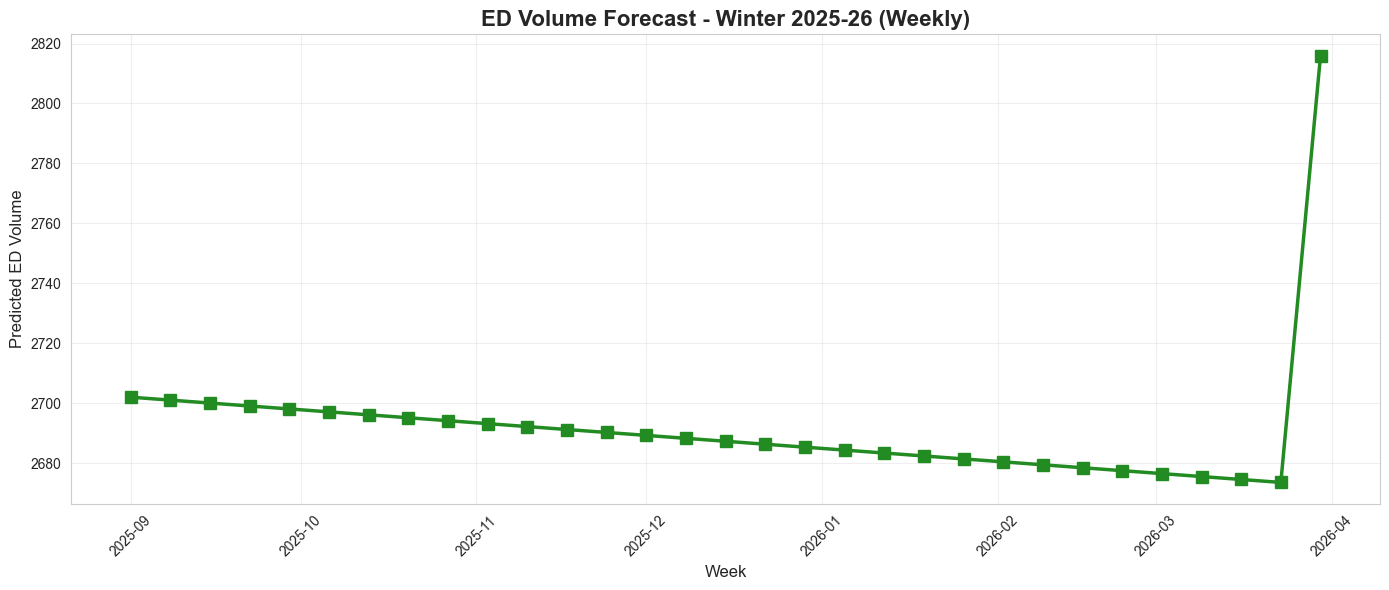

✓ Viz 3: Combined winter weekly forecast saved


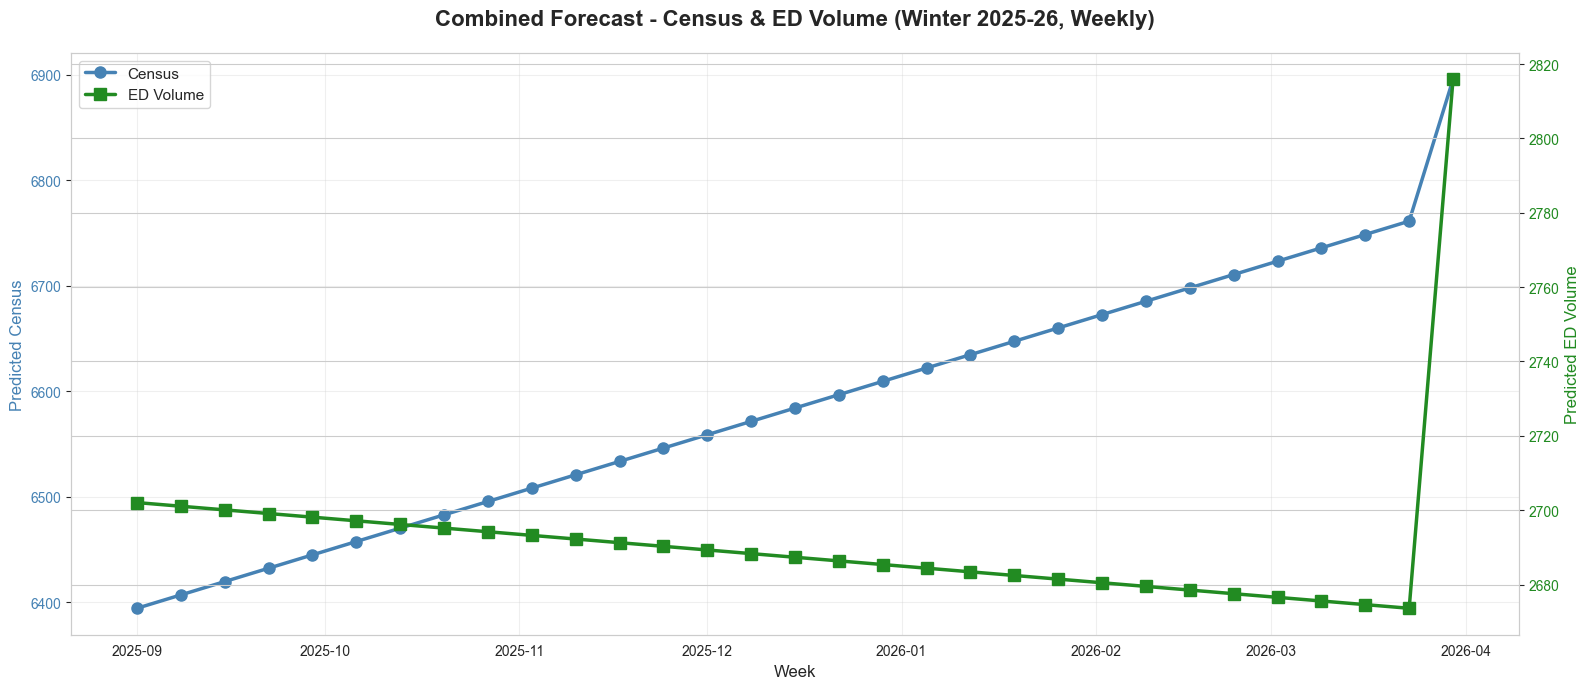

✓ Viz 4: Census 5-year monthly forecast saved


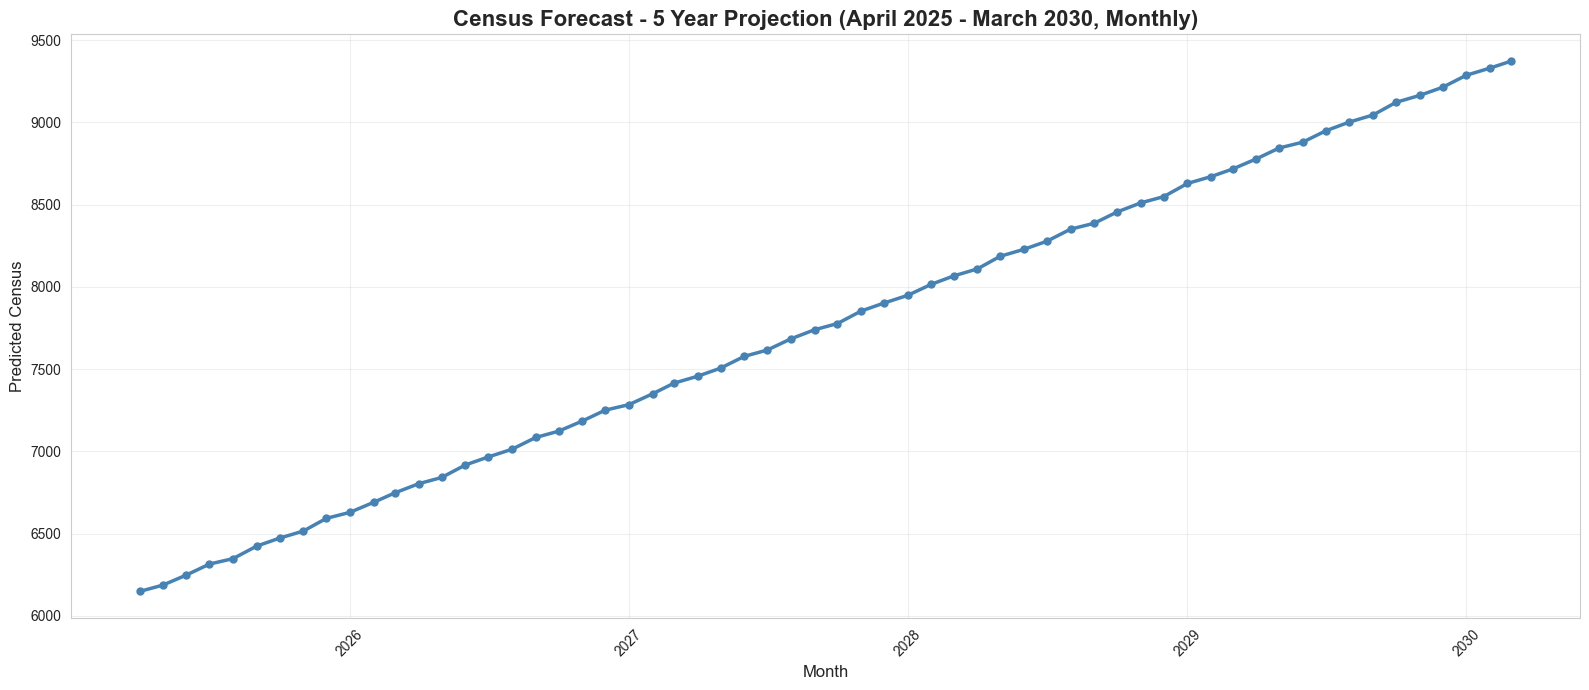

✓ Viz 5: ED 5-year monthly forecast saved


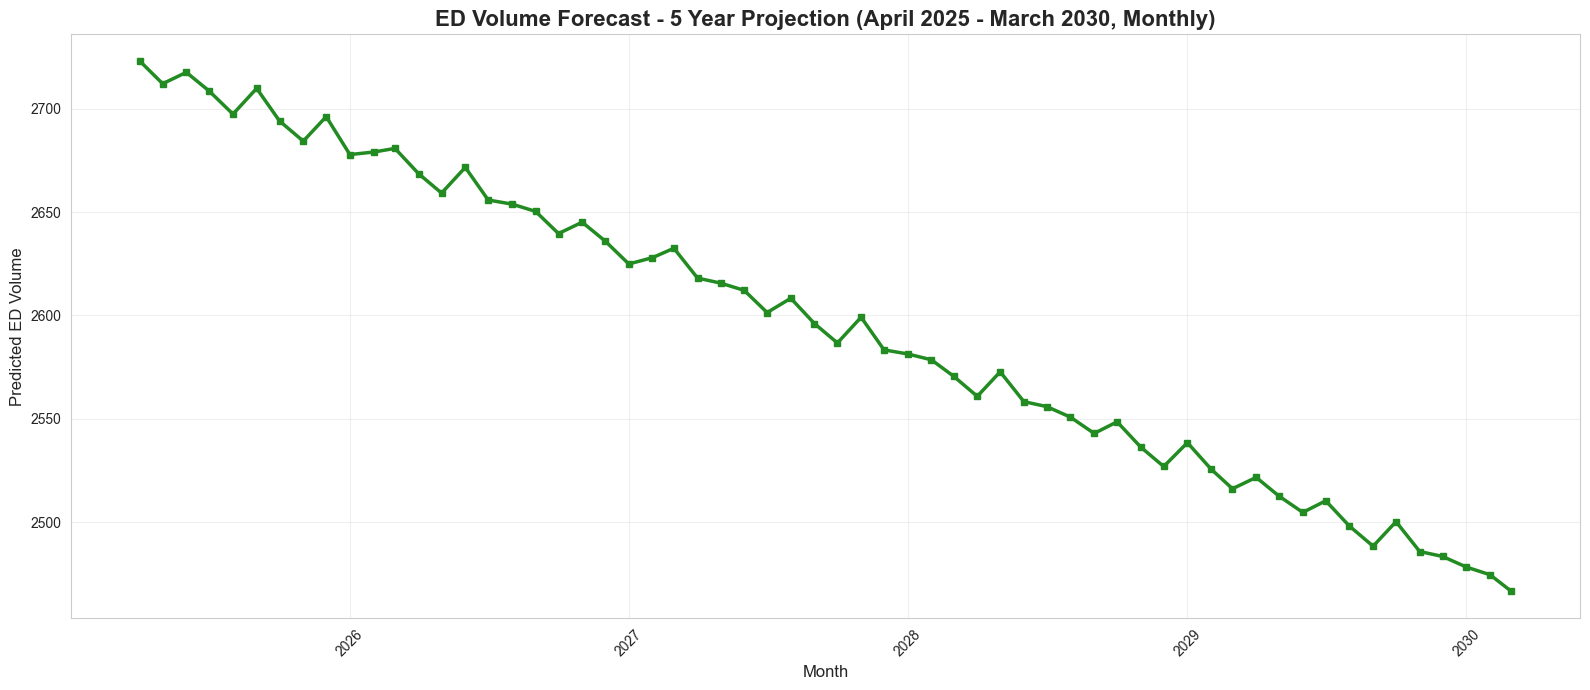

In [30]:
# ============================================================================
# 5. VISUALIZATIONS
# ============================================================================

print("\n5. CREATING VISUALIZATIONS...")

# Visualization 1: Census Predictions for Winter (Weekly)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(winter_census_weekly['Week'], winter_census_weekly['Census_Forecast'], 
        marker='o', linewidth=2.5, markersize=8, color='steelblue')
ax.set_title('Census Forecast - Winter 2025-26 (Weekly)', fontsize=16, fontweight='bold')
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Predicted Census', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/viz1_census_winter_weekly.png', dpi=300, bbox_inches='tight')
print("✓ Viz 1: Census winter weekly forecast saved")
plt.show()
plt.close()

# Visualization 2: ED Predictions for Winter (Weekly)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(winter_ed_weekly['Week'], winter_ed_weekly['ED_Forecast'], 
        marker='s', linewidth=2.5, markersize=8, color='forestgreen')
ax.set_title('ED Volume Forecast - Winter 2025-26 (Weekly)', fontsize=16, fontweight='bold')
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Predicted ED Volume', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/viz2_ed_winter_weekly.png', dpi=300, bbox_inches='tight')
print("✓ Viz 2: ED winter weekly forecast saved")
plt.show()
plt.close()

# Visualization 3: Combined Winter Predictions (Weekly)
fig, ax1 = plt.subplots(figsize=(16, 7))

color1 = 'steelblue'
ax1.set_xlabel('Week', fontsize=12)
ax1.set_ylabel('Predicted Census', fontsize=12, color=color1)
ax1.plot(winter_census_weekly['Week'], winter_census_weekly['Census_Forecast'], 
         marker='o', linewidth=2.5, markersize=8, color=color1, label='Census')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color2 = 'forestgreen'
ax2.set_ylabel('Predicted ED Volume', fontsize=12, color=color2)
ax2.plot(winter_ed_weekly['Week'], winter_ed_weekly['ED_Forecast'], 
         marker='s', linewidth=2.5, markersize=8, color=color2, label='ED Volume')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Combined Forecast - Census & ED Volume (Winter 2025-26, Weekly)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
#plt.savefig('/home/claude/viz3_combined_winter_weekly.png', dpi=300, bbox_inches='tight')
print("✓ Viz 3: Combined winter weekly forecast saved")
plt.show()
plt.close()

# Visualization 4: Census 5-Year Prediction (Monthly)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(monthly_census_agg['Month'], monthly_census_agg['Census_Forecast'], 
        linewidth=2.5, color='steelblue', marker='o', markersize=5)
ax.set_title('Census Forecast - 5 Year Projection (April 2025 - March 2030, Monthly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Predicted Census', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/viz4_census_5year_monthly.png', dpi=300, bbox_inches='tight')
print("✓ Viz 4: Census 5-year monthly forecast saved")
plt.show()
plt.close()

# Visualization 5: ED 5-Year Prediction (Monthly)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(monthly_ed_agg['Month'], monthly_ed_agg['ED_Forecast'], 
        linewidth=2.5, color='forestgreen', marker='s', markersize=5)
ax.set_title('ED Volume Forecast - 5 Year Projection (April 2025 - March 2030, Monthly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Predicted ED Volume', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/viz5_ed_5year_monthly.png', dpi=300, bbox_inches='tight')
print("✓ Viz 5: ED 5-year monthly forecast saved")
plt.show()
plt.close()

In [ ]:














# ============================================================================
# 6. SAVE FORECASTS TO EXCEL
# ============================================================================

with pd.ExcelWriter('/home/claude/sarimax_forecasts.xlsx', engine='openpyxl') as writer:
    winter_census_weekly.to_excel(writer, sheet_name='Winter_Census_Weekly', index=False)
    winter_ed_weekly.to_excel(writer, sheet_name='Winter_ED_Weekly', index=False)
    monthly_census_agg.to_excel(writer, sheet_name='5Year_Census_Monthly', index=False)
    monthly_ed_agg.to_excel(writer, sheet_name='5Year_ED_Monthly', index=False)

print("\n✓ All forecasts saved to: sarimax_forecasts.xlsx")

print("\n" + "=" * 80)
print("SARIMAX FORECASTING COMPLETE - 5 VISUALIZATIONS CREATED")
print("=" * 80)

## 3.3 SARIMAX IMPROVED

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Try to import Prophet (optional)
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except ImportError:
    PROPHET_AVAILABLE = False
    print("Note: Prophet not installed. Only SARIMA models will be used.")
    print("To install Prophet: pip install prophet")

sns.set_style("whitegrid")

In [31]:
# ============================================================================
# 1. FEATURE ENGINEERING - ADD EXOGENOUS VARIABLES
# ============================================================================

print("\n1. FEATURE ENGINEERING...")

def add_features(df, date_col):
    """Add calendar features, trend, COVID indicator, and seasonal dummies"""
    df = df.copy()
    df['DayOfWeek'] = df[date_col].dt.dayofweek
    df['Month'] = df[date_col].dt.month
    df['Quarter'] = df[date_col].dt.quarter
    df['Year'] = df[date_col].dt.year
    
    # Trend (days since start)
    df['Trend'] = (df[date_col] - df[date_col].min()).dt.days
    
    # COVID-19 indicator (2020-2021)
    df['COVID_Period'] = ((df[date_col] >= '2020-01-01') & 
                          (df[date_col] <= '2021-12-31')).astype(int)
    
    # Winter/Flu season (October to March)
    df['Winter_Season'] = df['Month'].isin([1, 2, 3, 10, 11, 12]).astype(int)
    
    # Weekend indicator
    df['Is_Weekend'] = (df['DayOfWeek'] >= 5).astype(int)
    
    return df

# Add features to Census data
census_clean = add_features(census_clean, 'Report_Date')
print("✓ Features added to Census data")

# Add features to ED data
ed_clean = add_features(ed_clean, 'ReportDate')
print("✓ Features added to ED data")


1. FEATURE ENGINEERING...
✓ Features added to Census data
✓ Features added to ED data


In [42]:
# ============================================================================
# 2. PREPARE SEPARATE DATASETS FOR EACH CAMPUS/SERVICE
# ============================================================================

print("\n2. PREPARING SEPARATE DATASETS...")

# Census: Separate by Campus and Service
census_groups = census_clean.groupby(['Campus', 'Service'])
census_dict = {}

for (campus, service), group in census_groups:
    key = f"{campus}_{service}"
    
    # Aggregate by date first (mean for numeric, first for categorical)
    daily_data = group.groupby('Report_Date').agg({
        'Census': 'mean',
        'DayOfWeek': 'first',
        'Month': 'first',
        'Quarter': 'first',
        'Year': 'first',
        'Trend': 'first',
        'COVID_Period': 'first',
        'Winter_Season': 'first',
        'Is_Weekend': 'first'
    })
    
    # Now create daily frequency
    daily_data = daily_data.asfreq('D').ffill()
    
    census_dict[key] = daily_data
    print(f"  {key}: {len(daily_data)} days")

# ED: Separate by Campus
ed_groups = ed_clean.groupby('Campus')
ed_dict = {}

for campus, group in ed_groups:
    # Aggregate by date first (mean for numeric, first for categorical)
    daily_data = group.groupby('ReportDate').agg({
        'ED Volume': 'mean',
        'DayOfWeek': 'first',
        'Month': 'first',
        'Quarter': 'first',
        'Year': 'first',
        'Trend': 'first',
        'COVID_Period': 'first',
        'Winter_Season': 'first',
        'Is_Weekend': 'first'
    })
    
    # Now create daily frequency
    daily_data = daily_data.asfreq('D').ffill()
    
    # Only include campuses with sufficient data (at least 365 days)
    if len(daily_data) >= 365:
        ed_dict[campus] = daily_data
        print(f"  ED_{campus}: {len(daily_data)} days")
    else:
        print(f"  ED_{campus}: {len(daily_data)} days - EXCLUDED (insufficient data)")


2. PREPARING SEPARATE DATASETS...
  SHB_Medicine: 1186 days
  SHB_Surgery: 1186 days
  SHC_Medicine: 1186 days
  SHC_Surgery: 1186 days
  SHG_Medicine: 1186 days
  SHG_Surgery: 1186 days
  ED_Birchmount: 3287 days
  ED_Centenary: 3287 days
  ED_General: 3287 days
  ED_SHC: 1 days - EXCLUDED (insufficient data)


In [43]:
# ============================================================================
# 3. SARIMA PARAMETER TUNING (GRID SEARCH WITH VALIDATION)
# ============================================================================

print("\n3. FINDING OPTIMAL SARIMA PARAMETERS WITH VALIDATION...")

def calculate_metrics(actual, predicted):
    """Calculate MAPE and MAE"""
    mae = np.mean(np.abs(actual - predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, mape

def find_best_sarima_params(data, exog_cols, value_col, max_order=2):
    """Grid search for best SARIMA parameters using MAPE"""
    best_mape = np.inf
    best_params = None
    best_mae = None
    
    # Split data: 80% train, 20% validation
    train_size = int(len(data) * 0.8)
    train_data = data.iloc[:train_size]
    val_data = data.iloc[train_size:]
    
    # Reduced grid for speed
    p = d = q = range(0, max_order)
    P = D = Q = [0, 1]
    s = [7]  # Weekly seasonality
    
    param_combinations = list(product(p, d, q, P, D, Q, s))
    
    print(f"    Testing {min(20, len(param_combinations))} parameter combinations...")
    
    # Test only a subset (first 20) for speed
    for params in param_combinations[:20]:
        try:
            model = SARIMAX(train_data[value_col],
                           exog=train_data[exog_cols],
                           order=(params[0], params[1], params[2]),
                           seasonal_order=(params[3], params[4], params[5], params[6]),
                           enforce_stationarity=False,
                           enforce_invertibility=False)
            result = model.fit(disp=False)
            
            # Forecast on validation set
            val_forecast = result.forecast(steps=len(val_data), exog=val_data[exog_cols])
            
            # Calculate metrics
            mae, mape = calculate_metrics(val_data[value_col].values, val_forecast.values)
            
            if mape < best_mape:
                best_mape = mape
                best_mae = mae
                best_params = params
        except:
            continue
    
    return best_params, best_mae, best_mape

# Find best params for one census group (for demonstration)
sample_key = list(census_dict.keys())[0]
sample_data = census_dict[sample_key]
exog_cols = ['DayOfWeek', 'Trend', 'COVID_Period', 'Winter_Season']

best_params, best_mae, best_mape = find_best_sarima_params(sample_data, exog_cols, 'Census')
print(f"✓ Best SARIMA params for {sample_key}: {best_params}")
print(f"  MAE: {best_mae:.2f}, MAPE: {best_mape:.2f}%")

# Use these params for all models (or tune individually for better results)
sarima_order = (best_params[0], best_params[1], best_params[2])
sarima_seasonal = (best_params[3], best_params[4], best_params[5], best_params[6])


3. FINDING OPTIMAL SARIMA PARAMETERS WITH VALIDATION...
    Testing 20 parameter combinations...
✓ Best SARIMA params for SHB_Medicine: (0, 0, 0, 1, 0, 0, 7)
  MAE: 47.58, MAPE: 6.61%


In [44]:
# ============================================================================
# 4. BUILD SEPARATE SARIMA MODELS FOR EACH GROUP WITH VALIDATION
# ============================================================================

print("\n4. BUILDING SEPARATE SARIMA MODELS WITH VALIDATION...")

exog_cols = ['DayOfWeek', 'Trend', 'COVID_Period', 'Winter_Season']

# Census models
census_models = {}
census_metrics = {}

for key, data in census_dict.items():
    try:
        # Split for validation
        train_size = int(len(data) * 0.8)
        train_data = data.iloc[:train_size]
        val_data = data.iloc[train_size:]
        
        # Fit model on training data
        model = SARIMAX(train_data['Census'],
                       exog=train_data[exog_cols],
                       order=sarima_order,
                       seasonal_order=sarima_seasonal,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        fit = model.fit(disp=False)
        
        # Validate
        val_forecast = fit.forecast(steps=len(val_data), exog=val_data[exog_cols])
        mae, mape = calculate_metrics(val_data['Census'].values, val_forecast.values)
        
        # Refit on full data
        model_full = SARIMAX(data['Census'],
                            exog=data[exog_cols],
                            order=sarima_order,
                            seasonal_order=sarima_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
        fit_full = model_full.fit(disp=False)
        
        census_models[key] = fit_full
        census_metrics[key] = {'MAE': mae, 'MAPE': mape}
        print(f"  ✓ {key} - MAE: {mae:.2f}, MAPE: {mape:.2f}%")
    except Exception as e:
        print(f"  ✗ {key} - Failed: {str(e)[:50]}")

# ED models
ed_models = {}
ed_metrics = {}

for campus, data in ed_dict.items():
    try:
        # Split for validation
        train_size = int(len(data) * 0.8)
        train_data = data.iloc[:train_size]
        val_data = data.iloc[train_size:]
        
        # Fit model on training data
        model = SARIMAX(train_data['ED Volume'],
                       exog=train_data[exog_cols],
                       order=sarima_order,
                       seasonal_order=sarima_seasonal,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        fit = model.fit(disp=False)
        
        # Validate
        val_forecast = fit.forecast(steps=len(val_data), exog=val_data[exog_cols])
        mae, mape = calculate_metrics(val_data['ED Volume'].values, val_forecast.values)
        
        # Refit on full data
        model_full = SARIMAX(data['ED Volume'],
                            exog=data[exog_cols],
                            order=sarima_order,
                            seasonal_order=sarima_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
        fit_full = model_full.fit(disp=False)
        
        ed_models[campus] = fit_full
        ed_metrics[campus] = {'MAE': mae, 'MAPE': mape}
        print(f"  ✓ ED_{campus} - MAE: {mae:.2f}, MAPE: {mape:.2f}%")
    except Exception as e:
        print(f"  ✗ ED_{campus} - Failed: {str(e)[:50]}")

# Print summary of best models
print("\n  SUMMARY:")
if census_metrics:
    best_census = min(census_metrics.items(), key=lambda x: x[1]['MAPE'])
    print(f"  Best Census Model: {best_census[0]} (MAPE: {best_census[1]['MAPE']:.2f}%)")
    avg_census_mape = np.mean([m['MAPE'] for m in census_metrics.values()])
    print(f"  Average Census MAPE: {avg_census_mape:.2f}%")

if ed_metrics:
    best_ed = min(ed_metrics.items(), key=lambda x: x[1]['MAPE'])
    print(f"  Best ED Model: {best_ed[0]} (MAPE: {best_ed[1]['MAPE']:.2f}%)")
    avg_ed_mape = np.mean([m['MAPE'] for m in ed_metrics.values()])
    print(f"  Average ED MAPE: {avg_ed_mape:.2f}%")


4. BUILDING SEPARATE SARIMA MODELS WITH VALIDATION...
  ✓ SHB_Medicine - MAE: 47.58, MAPE: 6.61%
  ✓ SHB_Surgery - MAE: 24.84, MAPE: 28.80%
  ✓ SHC_Medicine - MAE: 60.25, MAPE: 7.79%
  ✓ SHC_Surgery - MAE: 53.13, MAPE: 40.74%
  ✓ SHG_Medicine - MAE: 89.84, MAPE: 8.39%
  ✓ SHG_Surgery - MAE: 42.69, MAPE: 26.41%
  ✓ ED_Birchmount - MAE: 189.54, MAPE: 26.77%
  ✓ ED_Centenary - MAE: 200.00, MAPE: 18.14%
  ✓ ED_General - MAE: 228.45, MAPE: 25.09%

  SUMMARY:
  Best Census Model: SHB_Medicine (MAPE: 6.61%)
  Average Census MAPE: 19.79%
  Best ED Model: Centenary (MAPE: 18.14%)
  Average ED MAPE: 23.33%


In [48]:
# ============================================================================
# 5. BUILD PROPHET MODELS FOR EACH GROUP (if available)
# ============================================================================

if PROPHET_AVAILABLE:
    print("\n5. BUILDING PROPHET MODELS WITH VALIDATION...")

    def prepare_prophet_data(data, value_col, date_col_name):
        """Prepare data for Prophet format"""
        df = data.reset_index()
        df_prophet = pd.DataFrame({
            'ds': df[date_col_name],
            'y': df[value_col]
        })
        return df_prophet

    # Census Prophet models
    census_prophet_models = {}
    census_prophet_metrics = {}
    
    for key, data in census_dict.items():
        try:
            df_prophet = prepare_prophet_data(data, 'Census', data.index.name)
            
            # Split for validation
            train_size = int(len(df_prophet) * 0.8)
            train_prophet = df_prophet.iloc[:train_size]
            val_prophet = df_prophet.iloc[train_size:]
            
            # Train model
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_mode='multiplicative'
            )
            model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model.fit(train_prophet)
            
            # Validate
            val_forecast = model.predict(val_prophet[['ds']])
            mae, mape = calculate_metrics(val_prophet['y'].values, val_forecast['yhat'].values)
            
            # Refit on full data
            model_full = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_mode='multiplicative'
            )
            model_full.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model_full.fit(df_prophet)
            
            census_prophet_models[key] = model_full
            census_prophet_metrics[key] = {'MAE': mae, 'MAPE': mape}
            print(f"  ✓ Prophet {key} - MAE: {mae:.2f}, MAPE: {mape:.2f}%")
        except Exception as e:
            print(f"  ✗ Prophet {key} - Failed: {str(e)[:50]}")

    # ED Prophet models
    ed_prophet_models = {}
    ed_prophet_metrics = {}
    
    for campus, data in ed_dict.items():
        try:
            df_prophet = prepare_prophet_data(data, 'ED Volume', data.index.name)
            
            # Split for validation
            train_size = int(len(df_prophet) * 0.8)
            train_prophet = df_prophet.iloc[:train_size]
            val_prophet = df_prophet.iloc[train_size:]
            
            # Train model
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_mode='multiplicative'
            )
            model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model.fit(train_prophet)
            
            # Validate
            val_forecast = model.predict(val_prophet[['ds']])
            mae, mape = calculate_metrics(val_prophet['y'].values, val_forecast['yhat'].values)
            
            # Refit on full data
            model_full = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_mode='multiplicative'
            )
            model_full.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model_full.fit(df_prophet)
            
            ed_prophet_models[campus] = model_full
            ed_prophet_metrics[campus] = {'MAE': mae, 'MAPE': mape}
            print(f"  ✓ Prophet ED_{campus} - MAE: {mae:.2f}, MAPE: {mape:.2f}%")
        except Exception as e:
            print(f"  ✗ Prophet ED_{campus} - Failed: {str(e)[:50]}")
    
    # Print Prophet summary
    print("\n  PROPHET SUMMARY:")
    if census_prophet_metrics:
        best_census_prophet = min(census_prophet_metrics.items(), key=lambda x: x[1]['MAPE'])
        print(f"  Best Prophet Census Model: {best_census_prophet[0]} (MAPE: {best_census_prophet[1]['MAPE']:.2f}%)")
        avg_census_prophet_mape = np.mean([m['MAPE'] for m in census_prophet_metrics.values()])
        print(f"  Average Prophet Census MAPE: {avg_census_prophet_mape:.2f}%")
    
    if ed_prophet_metrics:
        best_ed_prophet = min(ed_prophet_metrics.items(), key=lambda x: x[1]['MAPE'])
        print(f"  Best Prophet ED Model: {best_ed_prophet[0]} (MAPE: {best_ed_prophet[1]['MAPE']:.2f}%)")
        avg_ed_prophet_mape = np.mean([m['MAPE'] for m in ed_prophet_metrics.values()])
        print(f"  Average Prophet ED MAPE: {avg_ed_prophet_mape:.2f}%")
        
else:
    print("\n5. SKIPPING PROPHET MODELS (not installed)")
    census_prophet_models = {}
    ed_prophet_models = {}
    census_prophet_metrics = {}
    ed_prophet_metrics = {}


5. BUILDING PROPHET MODELS WITH VALIDATION...


20:41:03 - cmdstanpy - INFO - Chain [1] start processing
20:41:03 - cmdstanpy - INFO - Chain [1] done processing
20:41:04 - cmdstanpy - INFO - Chain [1] start processing
20:41:04 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Prophet SHB_Medicine - MAE: 37.30, MAPE: 5.27%


20:41:04 - cmdstanpy - INFO - Chain [1] start processing
20:41:04 - cmdstanpy - INFO - Chain [1] done processing
20:41:05 - cmdstanpy - INFO - Chain [1] start processing
20:41:05 - cmdstanpy - INFO - Chain [1] done processing
20:41:05 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet SHB_Surgery - MAE: 21.20, MAPE: 20.40%


20:41:05 - cmdstanpy - INFO - Chain [1] done processing
20:41:05 - cmdstanpy - INFO - Chain [1] start processing
20:41:05 - cmdstanpy - INFO - Chain [1] done processing
20:41:06 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet SHC_Medicine - MAE: 48.19, MAPE: 6.37%


20:41:06 - cmdstanpy - INFO - Chain [1] done processing
20:41:06 - cmdstanpy - INFO - Chain [1] start processing
20:41:06 - cmdstanpy - INFO - Chain [1] done processing
20:41:06 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet SHC_Surgery - MAE: 20.49, MAPE: 13.59%


20:41:06 - cmdstanpy - INFO - Chain [1] done processing
20:41:06 - cmdstanpy - INFO - Chain [1] start processing
20:41:07 - cmdstanpy - INFO - Chain [1] done processing
20:41:07 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet SHG_Medicine - MAE: 107.69, MAPE: 10.37%


20:41:07 - cmdstanpy - INFO - Chain [1] done processing
20:41:07 - cmdstanpy - INFO - Chain [1] start processing
20:41:07 - cmdstanpy - INFO - Chain [1] done processing
20:41:07 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet SHG_Surgery - MAE: 52.80, MAPE: 27.96%


20:41:08 - cmdstanpy - INFO - Chain [1] done processing
20:41:08 - cmdstanpy - INFO - Chain [1] start processing
20:41:08 - cmdstanpy - INFO - Chain [1] done processing
20:41:08 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet ED_Birchmount - MAE: 50.36, MAPE: 6.93%


20:41:09 - cmdstanpy - INFO - Chain [1] done processing
20:41:09 - cmdstanpy - INFO - Chain [1] start processing
20:41:10 - cmdstanpy - INFO - Chain [1] done processing
20:41:10 - cmdstanpy - INFO - Chain [1] start processing


  ✓ Prophet ED_Centenary - MAE: 71.08, MAPE: 6.27%


20:41:10 - cmdstanpy - INFO - Chain [1] done processing
20:41:11 - cmdstanpy - INFO - Chain [1] start processing
20:41:11 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Prophet ED_General - MAE: 64.93, MAPE: 6.72%

  PROPHET SUMMARY:
  Best Prophet Census Model: SHB_Medicine (MAPE: 5.27%)
  Average Prophet Census MAPE: 13.99%
  Best Prophet ED Model: Centenary (MAPE: 6.27%)
  Average Prophet ED MAPE: 6.64%


In [51]:
# ============================================================================
# 6. SELECT BEST MODEL FOR EACH GROUP (SARIMA vs PROPHET)
# ============================================================================

print("\n6. SELECTING BEST MODELS BY MAPE...")

# Select best Census models
census_best_models = {}
census_best_type = {}

for key in census_dict.keys():
    sarima_mape = census_metrics.get(key, {}).get('MAPE', np.inf)
    prophet_mape = census_prophet_metrics.get(key, {}).get('MAPE', np.inf) if PROPHET_AVAILABLE else np.inf
    
    if sarima_mape <= prophet_mape:
        census_best_models[key] = census_models[key]
        census_best_type[key] = 'SARIMA'
        print(f"  {key}: SARIMA selected (MAPE: {sarima_mape:.2f}%)")
    else:
        census_best_models[key] = census_prophet_models[key]
        census_best_type[key] = 'Prophet'
        print(f"  {key}: Prophet selected (MAPE: {prophet_mape:.2f}%)")

# Select best ED models
ed_best_models = {}
ed_best_type = {}

for campus in ed_dict.keys():
    sarima_mape = ed_metrics.get(campus, {}).get('MAPE', np.inf)
    prophet_mape = ed_prophet_metrics.get(campus, {}).get('MAPE', np.inf) if PROPHET_AVAILABLE else np.inf
    
    if sarima_mape <= prophet_mape:
        ed_best_models[campus] = ed_models[campus]
        ed_best_type[campus] = 'SARIMA'
        print(f"  ED_{campus}: SARIMA selected (MAPE: {sarima_mape:.2f}%)")
    else:
        ed_best_models[campus] = ed_prophet_models[campus]
        ed_best_type[campus] = 'Prophet'
        print(f"  ED_{campus}: Prophet selected (MAPE: {prophet_mape:.2f}%)")

print(f"\n✓ Selected {sum(1 for v in census_best_type.values() if v == 'SARIMA')} SARIMA + {sum(1 for v in census_best_type.values() if v == 'Prophet')} Prophet for Census")
print(f"✓ Selected {sum(1 for v in ed_best_type.values() if v == 'SARIMA')} SARIMA + {sum(1 for v in ed_best_type.values() if v == 'Prophet')} Prophet for ED")


6. SELECTING BEST MODELS BY MAPE...
  SHB_Medicine: Prophet selected (MAPE: 5.27%)
  SHB_Surgery: Prophet selected (MAPE: 20.40%)
  SHC_Medicine: Prophet selected (MAPE: 6.37%)
  SHC_Surgery: Prophet selected (MAPE: 13.59%)
  SHG_Medicine: SARIMA selected (MAPE: 8.39%)
  SHG_Surgery: SARIMA selected (MAPE: 26.41%)
  ED_Birchmount: Prophet selected (MAPE: 6.93%)
  ED_Centenary: Prophet selected (MAPE: 6.27%)
  ED_General: Prophet selected (MAPE: 6.72%)

✓ Selected 2 SARIMA + 4 Prophet for Census
✓ Selected 0 SARIMA + 3 Prophet for ED


In [52]:
# ============================================================================
# 7. GENERATE FORECASTS USING BEST MODELS
# ============================================================================

print("\n7. GENERATING FORECASTS USING BEST MODELS...")

# Forecast parameters
forecast_days = 1825  # 5 years
last_date_census = max([data.index.max() for data in census_dict.values()])
last_date_ed = max([data.index.max() for data in ed_dict.values()])

forecast_start_census = last_date_census + pd.Timedelta(days=1)
forecast_start_ed = last_date_ed + pd.Timedelta(days=1)

# Create future dates
future_dates_census = pd.date_range(start=forecast_start_census, periods=forecast_days, freq='D')
future_dates_ed = pd.date_range(start=forecast_start_ed, periods=forecast_days, freq='D')

# Create future exogenous variables
def create_future_exog(future_dates, last_trend_value):
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Trend'] = last_trend_value + np.arange(1, len(future_dates) + 1)
    future_df['COVID_Period'] = 0  # No COVID in future
    future_df['Winter_Season'] = future_df['Month'].isin([1, 2, 3, 10, 11, 12]).astype(int)
    return future_df[['DayOfWeek', 'Trend', 'COVID_Period', 'Winter_Season']]

# Census forecasts using best models
census_forecasts = {}
for key, model in census_best_models.items():
    if census_best_type[key] == 'SARIMA':
        # SARIMA forecast
        last_trend = census_dict[key]['Trend'].iloc[-1]
        future_exog = create_future_exog(future_dates_census, last_trend)
        forecast = model.forecast(steps=forecast_days, exog=future_exog)
        census_forecasts[key] = pd.DataFrame({
            'Date': future_dates_census,
            'Forecast': forecast.values,
            'Model': 'SARIMA'
        })
    else:
        # Prophet forecast
        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)
        forecast_future = forecast[forecast['ds'] >= forecast_start_census][['ds', 'yhat']].reset_index(drop=True)
        census_forecasts[key] = pd.DataFrame({
            'Date': forecast_future['ds'],
            'Forecast': forecast_future['yhat'].values,
            'Model': 'Prophet'
        })

print(f"✓ Generated {len(census_forecasts)} Census forecasts using best models")

# ED forecasts using best models
ed_forecasts = {}
for campus, model in ed_best_models.items():
    if ed_best_type[campus] == 'SARIMA':
        # SARIMA forecast
        last_trend = ed_dict[campus]['Trend'].iloc[-1]
        future_exog = create_future_exog(future_dates_ed, last_trend)
        forecast = model.forecast(steps=forecast_days, exog=future_exog)
        ed_forecasts[campus] = pd.DataFrame({
            'Date': future_dates_ed,
            'Forecast': forecast.values,
            'Model': 'SARIMA'
        })
    else:
        # Prophet forecast
        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)
        forecast_future = forecast[forecast['ds'] >= forecast_start_ed][['ds', 'yhat']].reset_index(drop=True)
        ed_forecasts[campus] = pd.DataFrame({
            'Date': forecast_future['ds'],
            'Forecast': forecast_future['yhat'].values,
            'Model': 'Prophet'
        })

print(f"✓ Generated {len(ed_forecasts)} ED forecasts using best models")


7. GENERATING FORECASTS USING BEST MODELS...


✓ Generated 6 Census forecasts using best models
✓ Generated 3 ED forecasts using best models


In [53]:
# ============================================================================
# 8. AGGREGATE FORECASTS
# ============================================================================

print("\n8. AGGREGATING FORECASTS...")

# Aggregate Census forecasts (sum across all campus/service combinations)
census_total = pd.DataFrame({'Date': future_dates_census})
census_total['Total_Census'] = 0

for key, forecast_df in census_forecasts.items():
    census_total['Total_Census'] += forecast_df['Forecast'].values

# Aggregate ED forecasts (sum across all campuses)
ed_total = pd.DataFrame({'Date': future_dates_ed})
ed_total['Total_ED'] = 0

for campus, forecast_df in ed_forecasts.items():
    ed_total['Total_ED'] += forecast_df['Forecast'].values

print("✓ Aggregated all forecasts")


8. AGGREGATING FORECASTS...
✓ Aggregated all forecasts


In [54]:
# ============================================================================
# 9. EXTRACT WINTER AND 5-YEAR FORECASTS
# ============================================================================

print("\n9. EXTRACTING WINTER & 5-YEAR FORECASTS...")

# Winter 2025-26
winter_start = pd.Timestamp('2025-09-01')
winter_end = pd.Timestamp('2026-03-31')

winter_census = census_total[(census_total['Date'] >= winter_start) & 
                             (census_total['Date'] <= winter_end)].copy()
winter_ed = ed_total[(ed_total['Date'] >= winter_start) & 
                     (ed_total['Date'] <= winter_end)].copy()

# Weekly aggregation
winter_census['Week'] = winter_census['Date'].dt.to_period('W').dt.start_time
winter_census_weekly = winter_census.groupby('Week')['Total_Census'].mean().reset_index()
winter_census_weekly.columns = ['Week', 'Census_Forecast']

winter_ed['Week'] = winter_ed['Date'].dt.to_period('W').dt.start_time
winter_ed_weekly = winter_ed.groupby('Week')['Total_ED'].mean().reset_index()
winter_ed_weekly.columns = ['Week', 'ED_Forecast']

print(f"Winter Census avg: {winter_census_weekly['Census_Forecast'].mean():.0f}")
print(f"Winter ED avg: {winter_ed_weekly['ED_Forecast'].mean():.0f}")

# 5-year monthly (April 2025 to March 2030)
monthly_start = pd.Timestamp('2025-04-01')
monthly_end = pd.Timestamp('2030-03-31')

monthly_census = census_total[(census_total['Date'] >= monthly_start) & 
                              (census_total['Date'] <= monthly_end)].copy()
monthly_ed = ed_total[(ed_total['Date'] >= monthly_start) & 
                      (ed_total['Date'] <= monthly_end)].copy()

monthly_census['Month'] = monthly_census['Date'].dt.to_period('M').dt.start_time
monthly_census_agg = monthly_census.groupby('Month')['Total_Census'].mean().reset_index()
monthly_census_agg.columns = ['Month', 'Census_Forecast']

monthly_ed['Month'] = monthly_ed['Date'].dt.to_period('M').dt.start_time
monthly_ed_agg = monthly_ed.groupby('Month')['Total_ED'].mean().reset_index()
monthly_ed_agg.columns = ['Month', 'ED_Forecast']

print(f"5-year Census avg: {monthly_census_agg['Census_Forecast'].mean():.0f}")
print(f"5-year ED avg: {monthly_ed_agg['ED_Forecast'].mean():.0f}")


9. EXTRACTING WINTER & 5-YEAR FORECASTS...
Winter Census avg: 3634
Winter ED avg: 3185
5-year Census avg: 4823
5-year ED avg: 3649



10. CREATING VISUALIZATIONS...


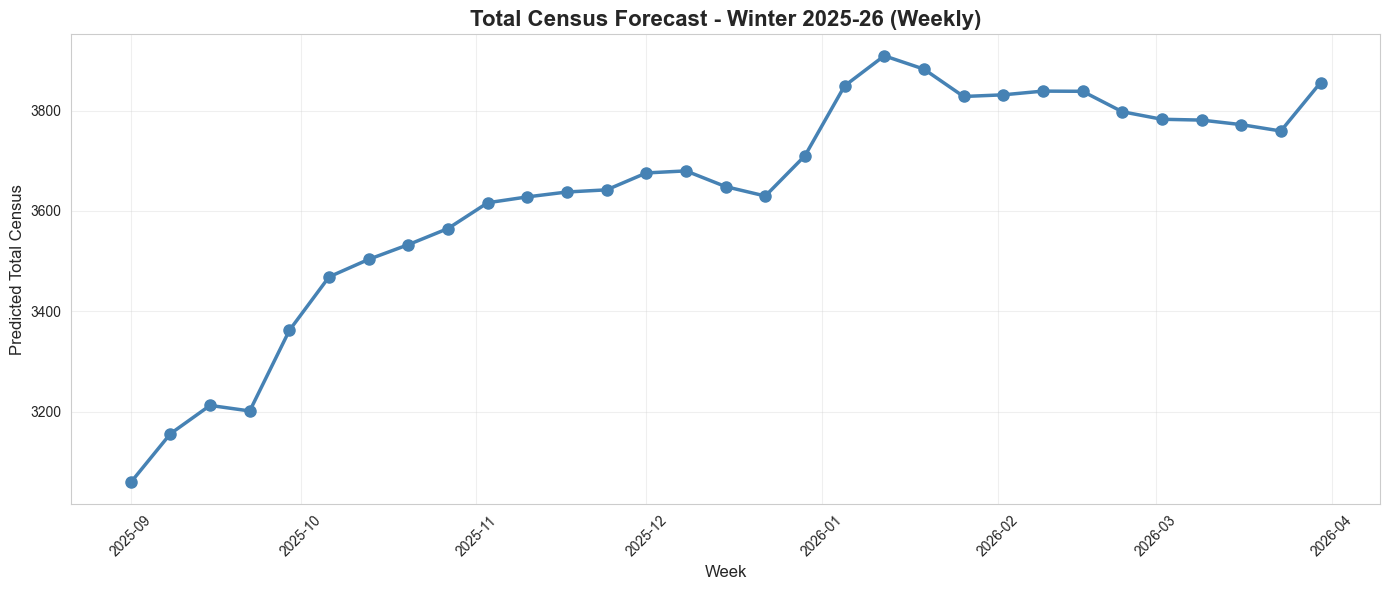

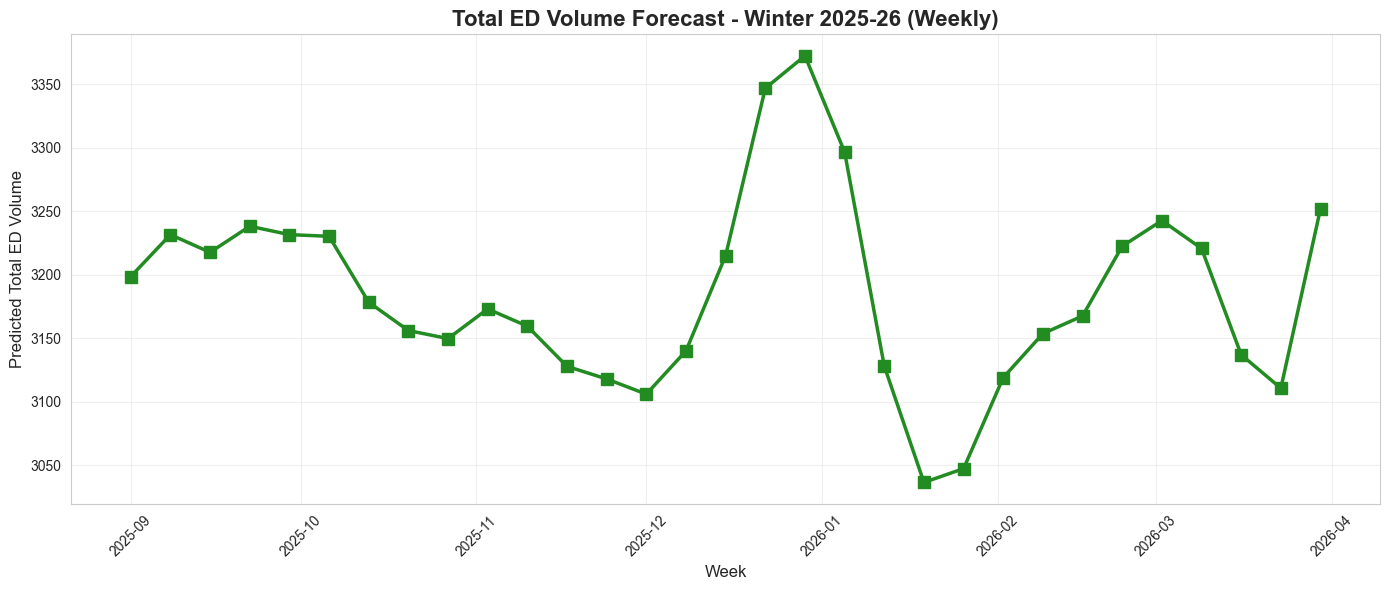

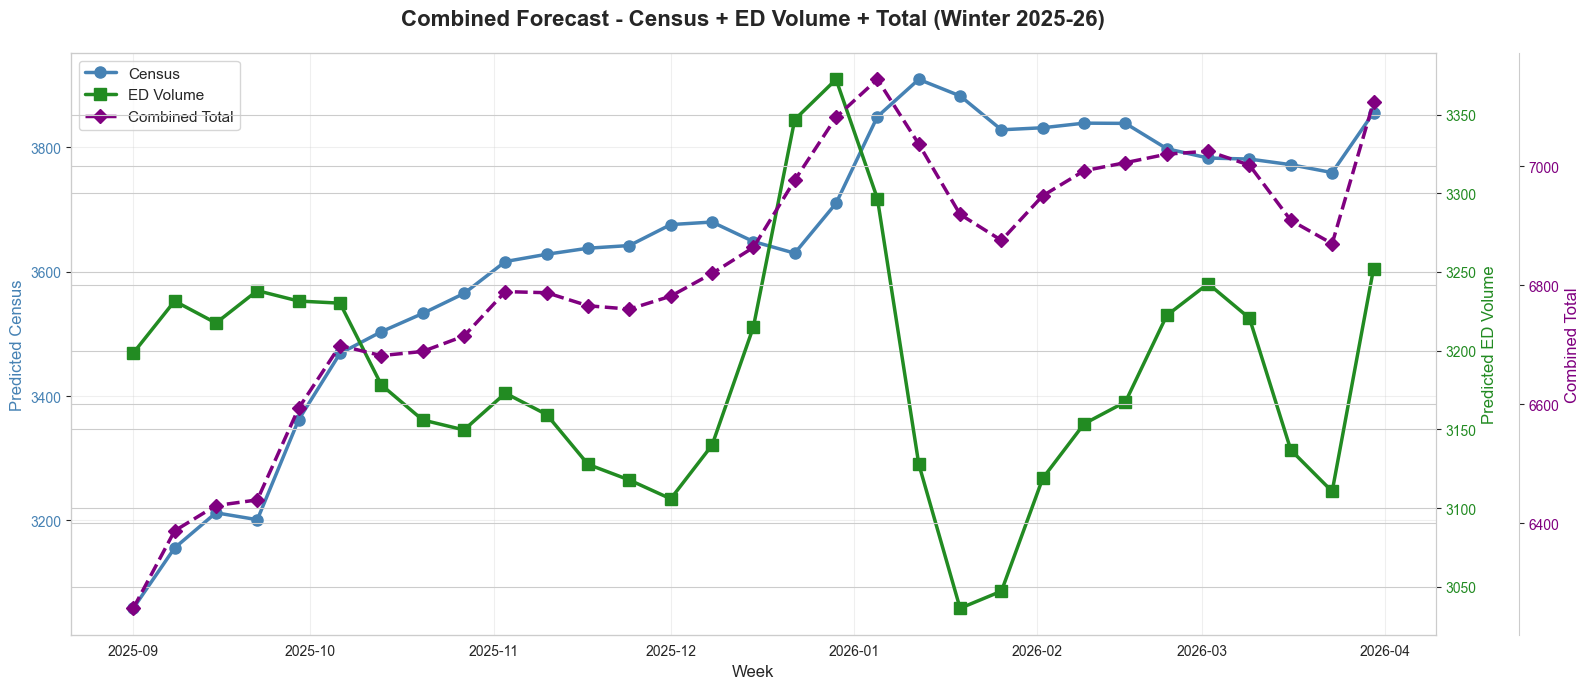

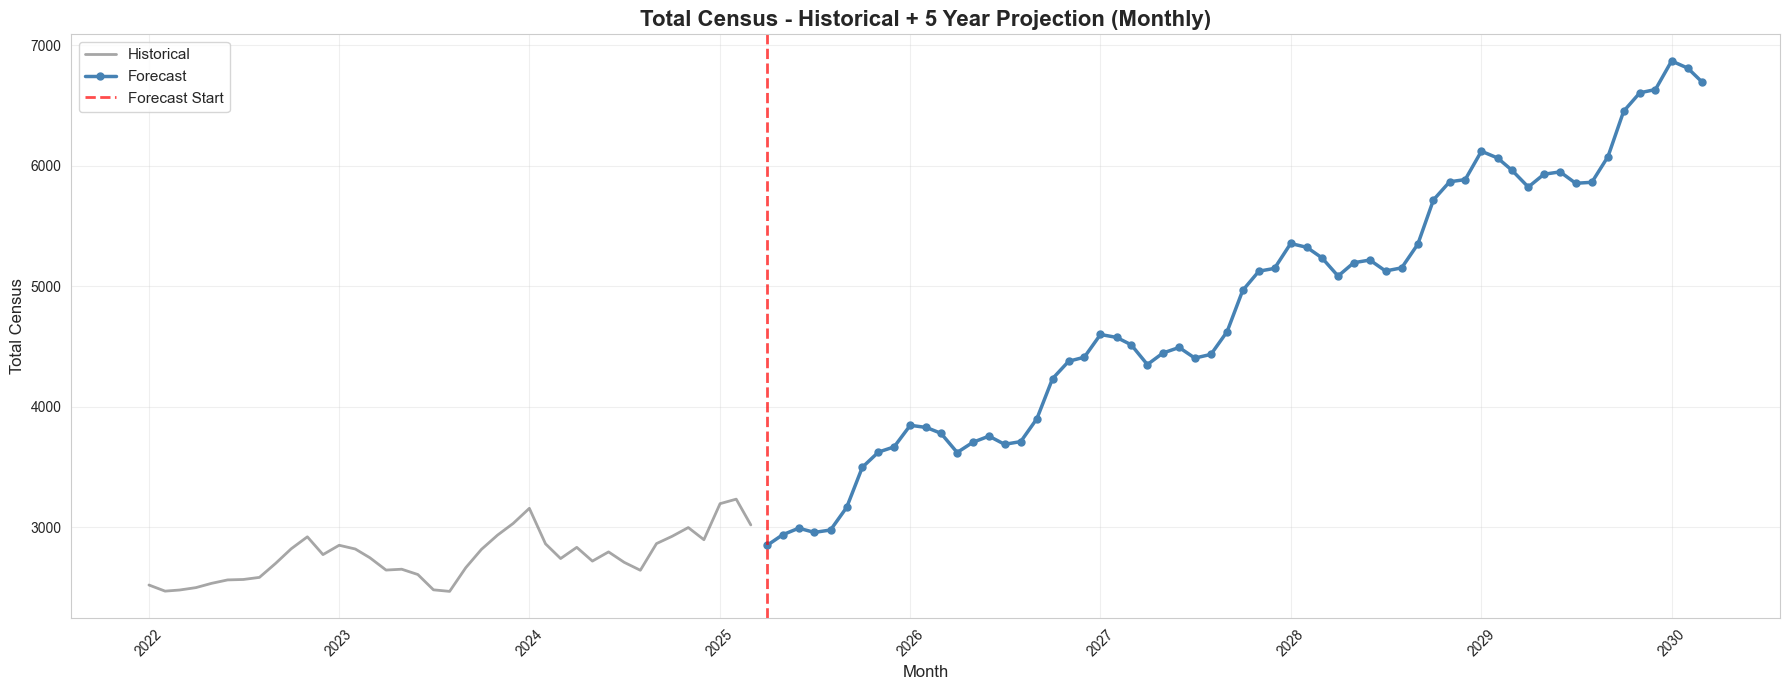

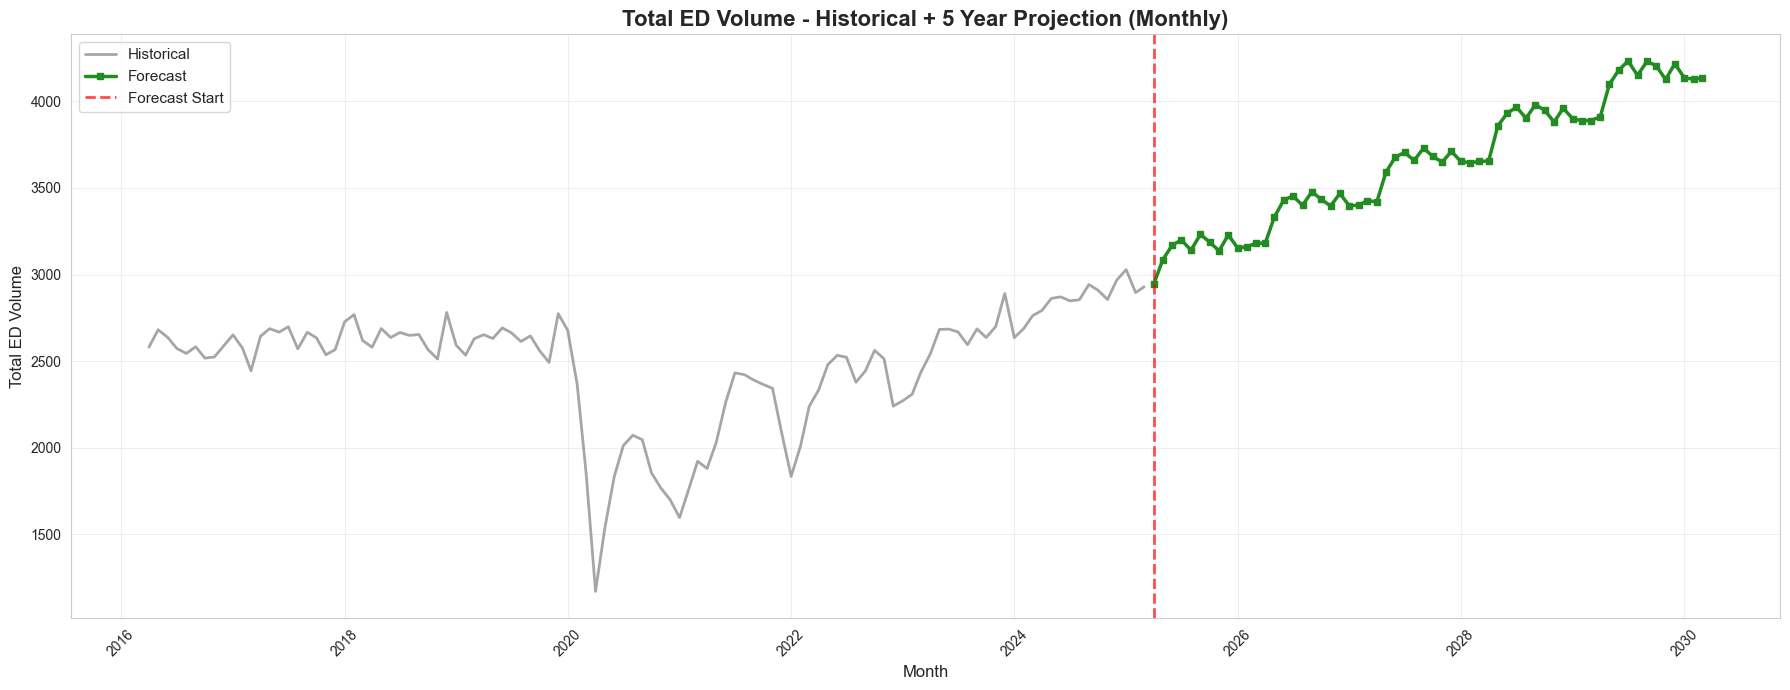

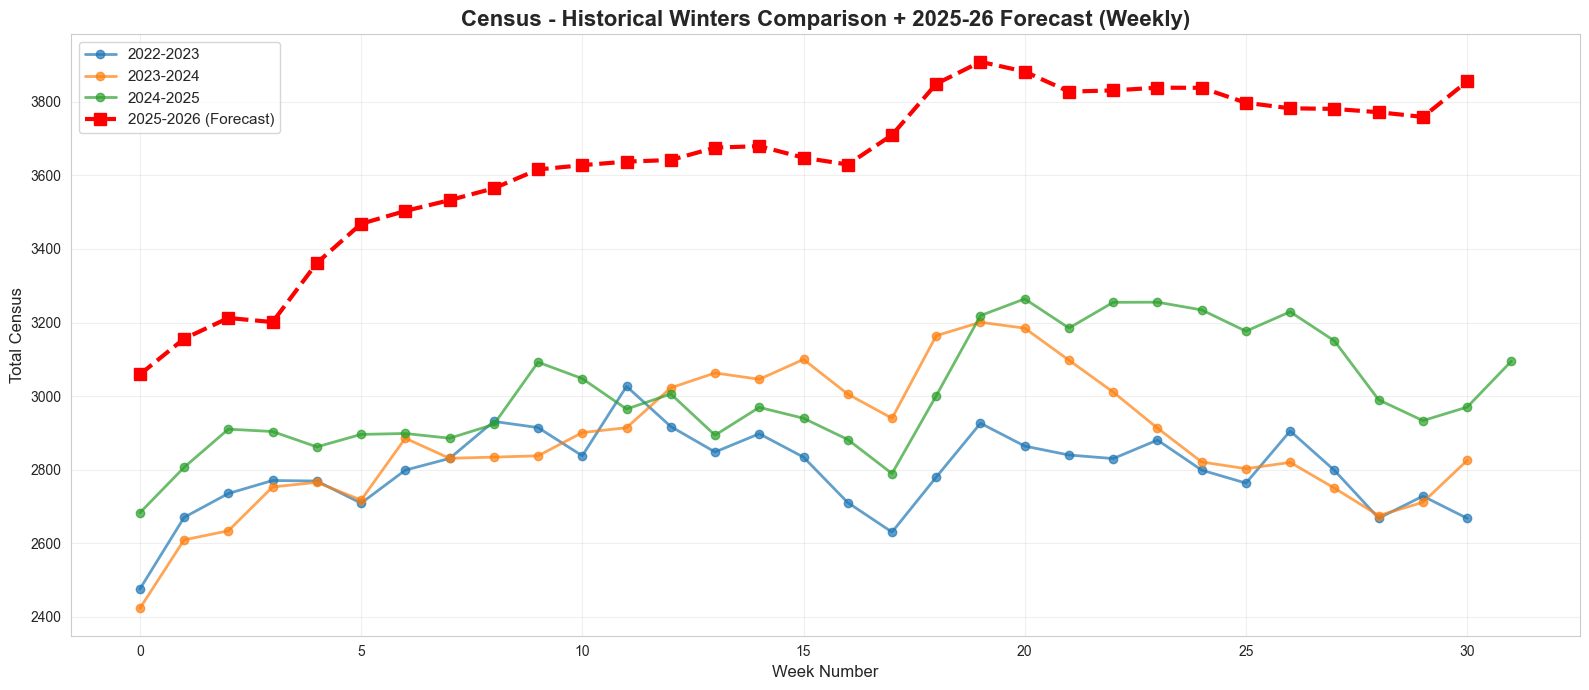

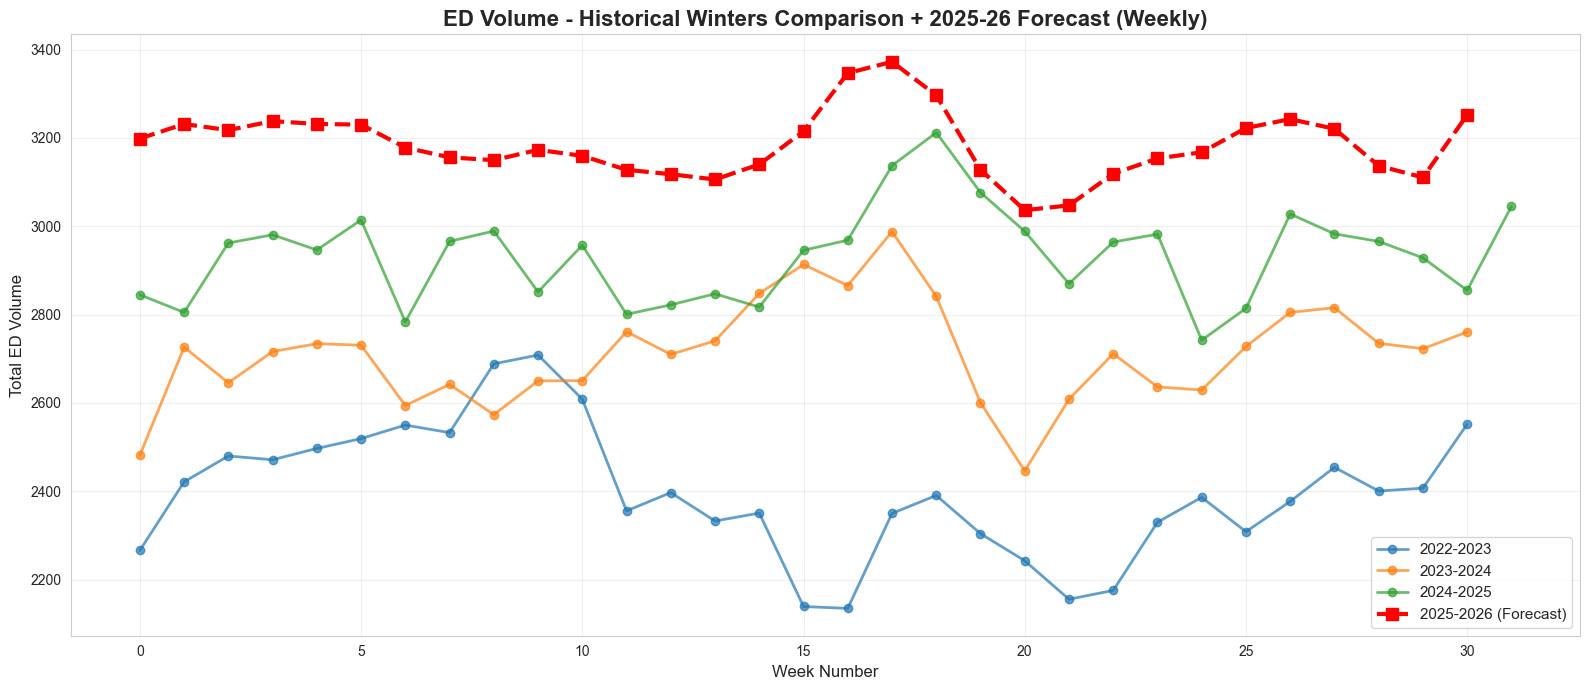

✓ All 7 visualizations created


In [61]:
# ============================================================================
# 10. CREATE VISUALIZATIONS
# ============================================================================

print("\n10. CREATING VISUALIZATIONS...")

# Viz 1: Census Winter Weekly
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(winter_census_weekly['Week'], winter_census_weekly['Census_Forecast'], 
        marker='o', linewidth=2.5, markersize=8, color='steelblue')
ax.set_title('Total Census Forecast - Winter 2025-26 (Weekly)', fontsize=16, fontweight='bold')
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Predicted Total Census', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Viz 2: ED Winter Weekly
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(winter_ed_weekly['Week'], winter_ed_weekly['ED_Forecast'], 
        marker='s', linewidth=2.5, markersize=8, color='forestgreen')
ax.set_title('Total ED Volume Forecast - Winter 2025-26 (Weekly)', fontsize=16, fontweight='bold')
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Predicted Total ED Volume', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Viz 3: Combined Winter with Total Line
fig, ax1 = plt.subplots(figsize=(16, 7))

color1 = 'steelblue'
ax1.set_xlabel('Week', fontsize=12)
ax1.set_ylabel('Predicted Census', fontsize=12, color=color1)
line1 = ax1.plot(winter_census_weekly['Week'], winter_census_weekly['Census_Forecast'], 
         marker='o', linewidth=2.5, markersize=8, color=color1, label='Census')[0]
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color2 = 'forestgreen'
ax2.set_ylabel('Predicted ED Volume', fontsize=12, color=color2)
line2 = ax2.plot(winter_ed_weekly['Week'], winter_ed_weekly['ED_Forecast'], 
         marker='s', linewidth=2.5, markersize=8, color=color2, label='ED Volume')[0]
ax2.tick_params(axis='y', labelcolor=color2)

# Add combined total line
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color3 = 'purple'
ax3.set_ylabel('Combined Total', fontsize=12, color=color3)
combined_total = winter_census_weekly['Census_Forecast'].values + winter_ed_weekly['ED_Forecast'].values
line3 = ax3.plot(winter_census_weekly['Week'], combined_total, 
         marker='D', linewidth=2.5, markersize=7, color=color3, label='Combined Total', linestyle='--')[0]
ax3.tick_params(axis='y', labelcolor=color3)

plt.title('Combined Forecast - Census + ED Volume + Total (Winter 2025-26)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45)

# Add legends
ax1.legend(handles=[line1, line2, line3], loc='upper left', fontsize=11)

plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Viz 4: Census 5-Year Monthly with Historical
fig, ax = plt.subplots(figsize=(18, 7))

# Historical data - aggregate from individual campus/service data
historical_census_full = pd.concat([census_dict[key]['Census'] for key in census_dict.keys()], axis=1).sum(axis=1)
historical_census_df = pd.DataFrame({'Date': historical_census_full.index, 'Census': historical_census_full.values})
historical_census_df['Month'] = historical_census_df['Date'].dt.to_period('M').dt.to_timestamp()
historical_census_monthly = historical_census_df.groupby('Month')['Census'].mean().reset_index()

# Plot historical
ax.plot(historical_census_monthly['Month'], historical_census_monthly['Census'], 
        linewidth=2, color='gray', label='Historical', alpha=0.7)

# Plot forecast
ax.plot(monthly_census_agg['Month'], monthly_census_agg['Census_Forecast'], 
        linewidth=2.5, color='steelblue', marker='o', markersize=5, label='Forecast')

# Add vertical line to separate historical from forecast
ax.axvline(x=pd.Timestamp('2025-04-01'), color='red', linestyle='--', linewidth=2, alpha=0.7, label='Forecast Start')

ax.set_title('Total Census - Historical + 5 Year Projection (Monthly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Census', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Viz 5: ED 5-Year Monthly with Historical
fig, ax = plt.subplots(figsize=(18, 7))

# Historical data - aggregate from individual campus data
historical_ed_full = pd.concat([ed_dict[campus]['ED Volume'] for campus in ed_dict.keys()], axis=1).sum(axis=1)
historical_ed_df = pd.DataFrame({'Date': historical_ed_full.index, 'ED': historical_ed_full.values})
historical_ed_df['Month'] = historical_ed_df['Date'].dt.to_period('M').dt.to_timestamp()
historical_ed_monthly = historical_ed_df.groupby('Month')['ED'].mean().reset_index()

# Plot historical
ax.plot(historical_ed_monthly['Month'], historical_ed_monthly['ED'], 
        linewidth=2, color='gray', label='Historical', alpha=0.7)

# Plot forecast
ax.plot(monthly_ed_agg['Month'], monthly_ed_agg['ED_Forecast'], 
        linewidth=2.5, color='forestgreen', marker='s', markersize=5, label='Forecast')

# Add vertical line to separate historical from forecast
ax.axvline(x=pd.Timestamp('2025-04-01'), color='red', linestyle='--', linewidth=2, alpha=0.7, label='Forecast Start')

ax.set_title('Total ED Volume - Historical + 5 Year Projection (Monthly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total ED Volume', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# NEW Viz 6: Historical Winters Comparison - Census
fig, ax = plt.subplots(figsize=(16, 7))

# Get historical census data
historical_census_full = pd.concat([census_dict[key]['Census'] for key in census_dict.keys()], axis=1).sum(axis=1)

# Extract winters from historical data
winters = {
    '2022-2023': (pd.Timestamp('2022-09-01'), pd.Timestamp('2023-03-31')),
    '2023-2024': (pd.Timestamp('2023-09-01'), pd.Timestamp('2024-03-31')),
    '2024-2025': (pd.Timestamp('2024-09-01'), pd.Timestamp('2025-03-31')),
}

colors_hist = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, (winter_name, (start, end)) in enumerate(winters.items()):
    winter_data = historical_census_full[(historical_census_full.index >= start) & 
                                         (historical_census_full.index <= end)]
    if len(winter_data) > 0:
        # Aggregate to weekly
        winter_df = pd.DataFrame({'Date': winter_data.index, 'Census': winter_data.values})
        winter_df['Week'] = winter_df['Date'].dt.to_period('W').dt.to_timestamp()
        winter_weekly_hist = winter_df.groupby('Week')['Census'].mean().reset_index()
        
        ax.plot(range(len(winter_weekly_hist)), winter_weekly_hist['Census'], 
                marker='o', linewidth=2, markersize=6, label=winter_name, color=colors_hist[i], alpha=0.7)

# Add forecast for 2025-2026
ax.plot(range(len(winter_census_weekly)), winter_census_weekly['Census_Forecast'], 
        marker='s', linewidth=3, markersize=8, label='2025-2026 (Forecast)', color='red', linestyle='--')

ax.set_title('Census - Historical Winters Comparison + 2025-26 Forecast (Weekly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Total Census', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# NEW Viz 7: Historical Winters Comparison - ED
fig, ax = plt.subplots(figsize=(16, 7))

# Get historical ED data
historical_ed_full = pd.concat([ed_dict[campus]['ED Volume'] for campus in ed_dict.keys()], axis=1).sum(axis=1)

# Extract winters from historical data
for i, (winter_name, (start, end)) in enumerate(winters.items()):
    winter_data = historical_ed_full[(historical_ed_full.index >= start) & 
                                     (historical_ed_full.index <= end)]
    if len(winter_data) > 0:
        # Aggregate to weekly
        winter_df = pd.DataFrame({'Date': winter_data.index, 'ED': winter_data.values})
        winter_df['Week'] = winter_df['Date'].dt.to_period('W').dt.to_timestamp()
        winter_weekly_hist = winter_df.groupby('Week')['ED'].mean().reset_index()
        
        ax.plot(range(len(winter_weekly_hist)), winter_weekly_hist['ED'], 
                marker='o', linewidth=2, markersize=6, label=winter_name, color=colors_hist[i], alpha=0.7)

# Add forecast for 2025-2026
ax.plot(range(len(winter_ed_weekly)), winter_ed_weekly['ED_Forecast'], 
        marker='s', linewidth=3, markersize=8, label='2025-2026 (Forecast)', color='red', linestyle='--')

ax.set_title('ED Volume - Historical Winters Comparison + 2025-26 Forecast (Weekly)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Total ED Volume', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('/home/claude/improved_viz2_ed_winter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ All 7 visualizations created")